<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Como_configurar_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cómo configurar las gráficas

En investigación, especialmente en disciplinas como la biomecánica, continuamente necesitamos crear gráficas. Esto normalmente se puede realizar con relativa facilidad en Excel o cualquier otro tipo de hoja de cálculo. Sin embargo, hacerlo con hojas de cálculo puede presentar varios problemas. **Uno**, que si tenemos que repetir la misma gráfica con varios conjuntos de datos similares, se puede convertir en una tarea muy farragosa y poco práctica, especialmente si la gráfica requiere una configuración compleja. Y **otro problema** es que cuando necesitamos una gráfica para incluir en un artículo y la revista a la que lo vamos a enviar nos exige una calidad concreta de definición en la imagen (pixels por pulgada o dots per inch, dpi), las hojas de cálculo no suelen permitir configurar la resolución final.

Con Python podemos solucionar todos esos problemas, permitiendo crear desde gráficas rápidas y sencillas con fines de simple visualización, hasta crear gráficas complejas en las que podemos ajustar hasta el más mínimo detalle.

Veremos paso a paso los tipos de gráfica más usuales y todo lo que podemos retocar para conseguir el nivel de detalle que necesitemos.

En primer lugar se cargan las librerías básicas que vamos a utilizar.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #librería básica para hacer gráficas
 
import seaborn as sns #librería que mejora matplotlib para automatizar gráficos más complejos
#sns.set_style("white" and 'ticks') #esto es opcional, es una forma rápida de fijar las características generales de todas las gráficas


Como ejemplo, se crean unos datos sencillos basados en una onda sinusoidal y se presentan directamente, de momento sin preocuparnos por su aspecto. 
Una vez tenemos los datos, la forma más rápida y directa de crear una gráfica se consigue con dos líneas.

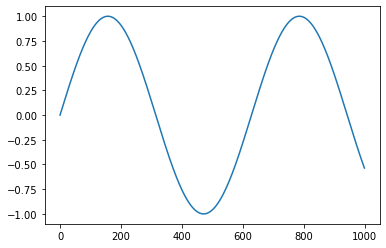

In [ ]:
#creamos unos datos cualquiera
x = np.arange(0,10, 0.01) #esta varaible simula una medida de tiempo en segundos
y = np.sin(x) #crea una onda seno basada en los datos de tiempo
y2= np.cos(x) #crea una onda coseno basada en los datos de tiempo

#Formato rápido
plt.plot(y) #crea la gráfica y la presenta

Fíjate que en el ejemplo de arriba, se representa en el eje vertical la variable que hemos creado, mientras que el eje horizontal indica el índice de cada valor, es decir su orden dentro de la variable. Si queremos por ejemplo que el eje X contenga una representación del tiempo, incluimos la variable del eje X seguida de la del eje Y.

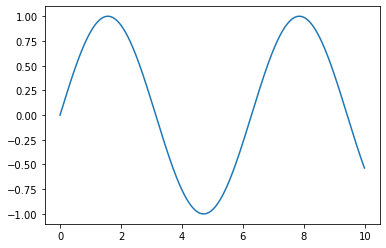

In [ ]:
plt.plot(x, y)

Podemos representar tantas gráficas como queramos dentro de la misma figura.

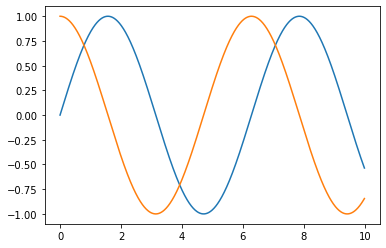

In [ ]:
plt.plot(x, y) #gráfica del seno
plt.plot(x, y2) #gráfica del coseno

Para que dibuje varias líneas en la misma figura, las ponemos todas seguidas y cuando hayamos terminado, se cierra la figura con plt.show(). De esta manera, si se incluyen otras instrucciones de dibujar gráficas las incluirá en otra figura distinta sin mezclarlas.
Por ejemplo, si separamos cada instrucción de gráfica con plt.show() representa en la figura las líneas que se hayan indicado hasta ese momento.


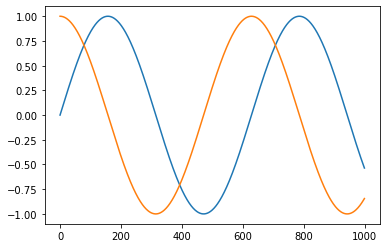

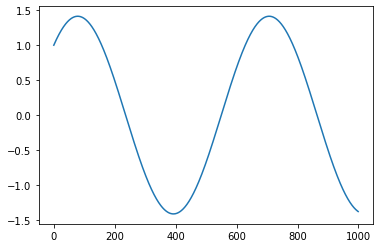

In [ ]:
plt.plot(y) #gráfica del seno
plt.plot(y2) #gráfica del coseno
plt.show() #cierra la gráfica para que no se mezcle con otras que creemos después

plt.plot(y+y2) #gráfica del seno + coseno
plt.show() #cierra otra figura con las líneas creadas después del último plt.show()

En este mismo ejemplo, nos puede interesar representar en el eje X el tiempo, que habíamos introducido en la variable x.

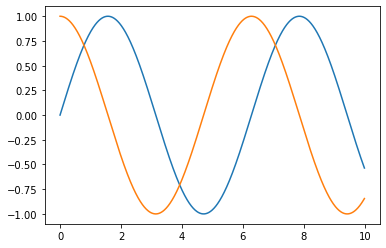

In [ ]:
plt.plot(x, y) #gráfica del seno
plt.plot(x, y2) #gráfica del coseno
plt.show()

Ahora el eje x representa cómo evoluciona el tiempo en segundos.
Esta gráfica podría ser suficiente para explorar rápidamente los datos, pero podemos configurar todas sus características al detalle, y es lo que haremos a continuación.

## Ajustar el formato de las gráficas

Podemos cambiar las características de las líneas, poner título al gráfico y a los ejes.

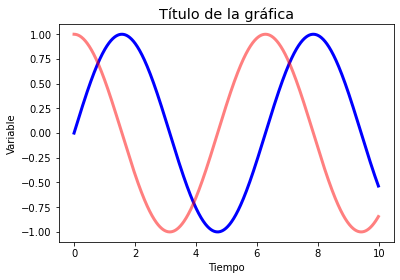

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, y, color='blue', linewidth=3) #linewidth o lw
plt.plot(x, y2, color='red', linewidth=3, alpha=0.5) #alpha controla la transparencia: 1= opaco; 0= transparente
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Título de la gráfica', fontsize='x-large') #se puede controlar el tamaño de cualquier texto, con nombre cualitativos ('smaller', 'small, 'large', 'x-large', etc.) o con el tamaño en de letra en valor numérico exacto
plt.show()

Más controles de elmentos específicos del gráfico

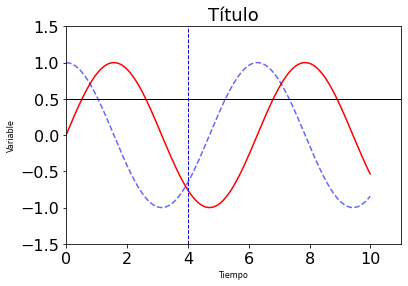

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, y, 'r-') #se puede indicar simultáneamente el color y el estilo. '-' es línea contínua; '--' línea discontinua, etc.
plt.plot(x, y2, 'b--', alpha=0.6) #con alpha se controla la transparencia de la línea

ax.axhline(y=0.5, lw=1, color='k') #introduce una línea horizontal
ax.axvline(x=4.0, lw=1, color='b', linestyle='--') #introduce una línea vertical

ax.set_xlabel('Tiempo', fontsize=8)
ax.set_ylabel('Variable', fontsize=8)
ax.set_title('Título', fontsize=18)
ax.set_xlim((0, 11)) #acota el tamaño del eje x
ax.set_ylim((-1.5, 1.5)) #acota el tamaño del eje y
ax.tick_params(axis='both', which='major', labelsize=16) #ajusta el tamaño de letra de las etiquetas de los ejes. axis puede ser 'both', 'x' o 'y', y wich puede ser 'major' o 'minor'
plt.show()


Se puede incluso configurar el aspecto de las líneas discontínuas, incluyendo el argumento linestile (o ls). Hay varios estilos posibles: ":", "--", "-.", "-".

Se puede controlar la longitud y separación entre rayas con dashes=(5, 3), el primer valor es la longitud de la línea y el segundo el espacio entre líneas.

También se puede hacer que las líneas tengan el inicio y final redondeado: solid_capstyle='round'

y que las líneas discontínuas sean redondeadas: dash_capstyle='round'

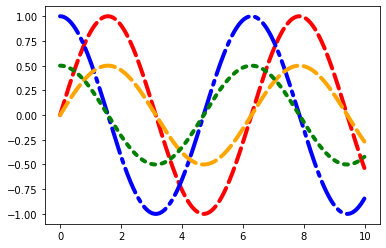

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, y, 'r', lw=4, linestyle='--', dash_capstyle='round')
plt.plot(x, y2, 'b', lw=4, ls='-.', dash_capstyle='round') 

plt.plot(x, y*0.5, 'orange', lw=4, linestyle='--', dash_capstyle='round')
plt.plot(x, y2*0.5, 'g', lw=4, ls=':', dash_capstyle='round')

plt.show()

Aparte de tener los estilos básicos de líneas discontinuas (:, --, y -.), también se pueden crear los patrones de líneas discontinuas a mano, como se muestra en el siguiente ejemplo. 

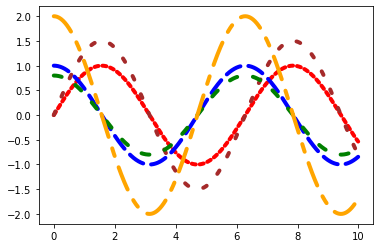

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, y, 'r', lw=4, linestyle='--', dash_capstyle='round', dashes=[1, 1]) #1 punto pintado, 1 punto hueco
plt.plot(x, y*1.5, 'brown', lw=4, linestyle='--', dash_capstyle='round', dashes=[1, 4]) #1 punto pintado, 4 puntos huecos

plt.plot(x, y2, 'b', lw=4, ls='-.', dash_capstyle='round', dashes=(4, 2)) #4 puntos pintados, 2 puntos huecos
plt.plot(x, y2*0.8, 'g', lw=4, ls=':', dash_capstyle='round', dashes=(2, 4)) #2 puntos pintados, 4 puntos huecos

#incluso se pueden hacer patrones más complejos
plt.plot(x, y2*2, 'orange', lw=4, ls='--', dash_capstyle='round', dashes=(6, 3, 2, 3)) #6  pintados, 3 huecos, 2 pintados, 3 huecos

plt.show()

### Variación de colores según una 3ª categoría
Algunas veces nos interesa que la línea de una gráfica cambie de color para representar otra variable (como si fuera una tercera dimensión en el plano del gráfico).

En este ejemplo, la línea de la gráfica se oscurece cuando la variable se acerca a 1 o a -1, pero podría utilizarse una tercera variable para ajustar el color de la línea. Para que parezca que cambia de color se hace el truco de hacerlo como gráfica scatter y pegar mucho los puntos, cada punto tiene un color. El vector de color tiene que estar entre 0 y 1. Si la variable a representar es >1, se normaliza con c=cm.hot(y/y.max())

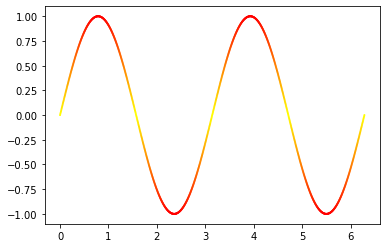

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm #importa caracteríscicas de paletas de color

#Se crea una variable seno 
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(2*x)
plt.scatter(x,y, c=cm.autumn_r(np.abs(y)), s=4, edgecolor='none') #aquí se ha usado la paleta de colores autum, que va de amarillo a rojo. Otras pueden ser hot (de amarillo a marrón oscuro), etc.
plt.show()

### Modificar el tamaño de la figura

También se puede controlar el tamaño de la figura al iniciarla. Con ***figsize*** se indica el tamaño en pulgadas (en matoplotlib se utilizan pulgadas, para pasarlo a centímetros se multiplican por 2.54).

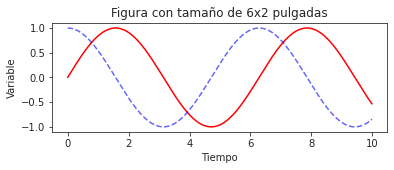

In [ ]:
fig, ax = plt.subplots(figsize=(6,2)) #crea una figura de 6x2 pulgadas
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Figura con tamaño de 6x2 pulgadas')
plt.show()



En cambio con el parámetro ***dpi*** se indica los puntos por pulgada. Por defecto dpi es 100, pero se puede ajustar como se quiera. En la siguiente figura se representa al doble de dpi que la anterior, por eso se ve el doble de grande.

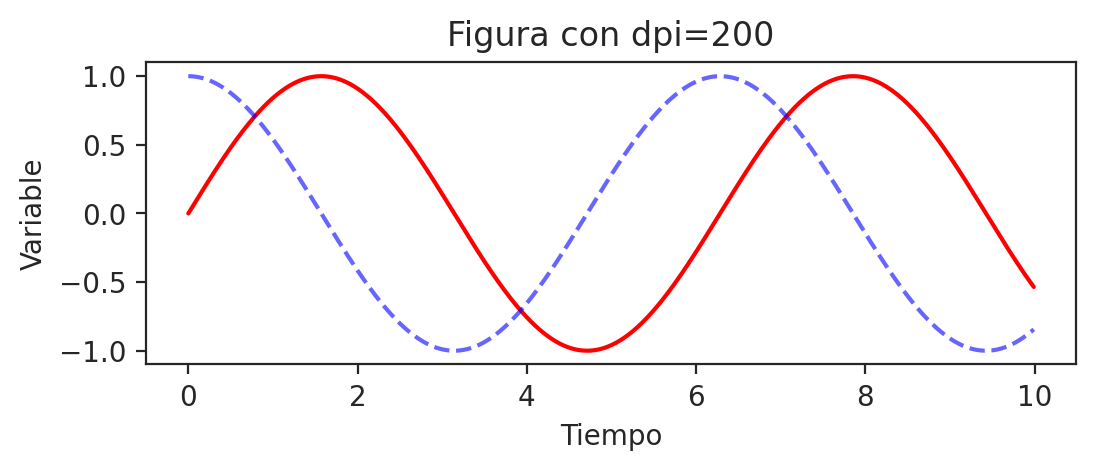

In [ ]:
fig, ax = plt.subplots(figsize=(6,2), dpi=200)
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Figura con dpi=200')
plt.show()

Fíjate en que al cambiar el parámetro dpi, también cambian los elementos del gráfico proporcionalmente. Esto es porque en matplotlib el tamaño de los elementos se define por puntos. Por ejemplo, una letra con tamaño 12 quiere decir que tiene un tamaño de 12 puntos de alto. Con un dpi de 100 serían 12/100 = 0.12 pulgadas de alto, pero con un dpi de 200 serían 12/200 = 0.06 pulgadas de alto. Lo mismo pasa con las líneas, una línea de 1 punto de grosor, con el doble de dpi será el doble de gruesa en dimensiones reales, pero mantiene la misma proporción con el resto del gráfico.
Si por ejemplo quisiéramos agrandar la imagen cambiando figsize, el tamaño sería el pismo pero se perdería la proporción de los elementos, y se verían más pequeños. En el siguiente ejemplo se crea la misma figura anterior, pero con la mitad de dpi y el doble en figsize.


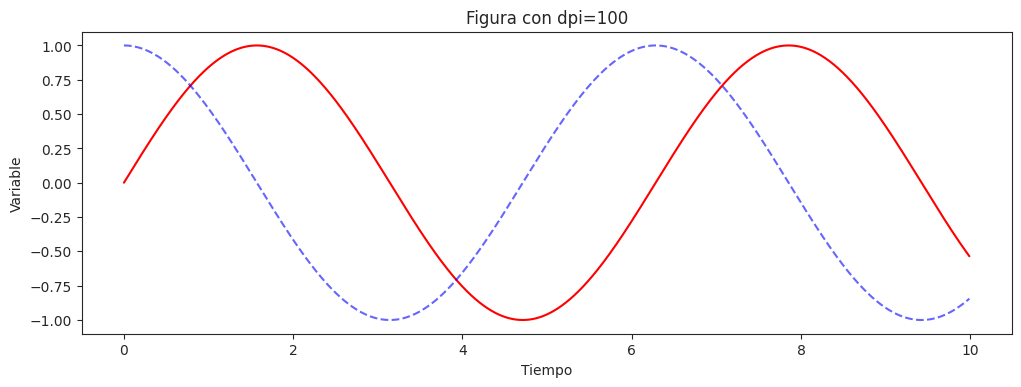

In [ ]:
fig, ax = plt.subplots(figsize=(12,4), dpi=100)
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Figura con dpi=100')
plt.show()

El tamaño resultante en píxeles en cualquier imangen digital siempre depende de la combinación de estos dos parámetros: el tamaño real de la imagen y los puntos por pulgada.
Si por ejemplo se quiere hacer una imagen con tamaño 600 x 400 píxeles, se puede hacer con distintas combinaciones de figsize y dpi:

figsize=(12, 8), dpi= 50

figsize=(6, 4)  , dpi=100

figsize=(4, 2.67)  , dpi=150

figsize=( 3, 2)  , dpi=200

Como se puede apreciar en las figuras de abajo, el tamaño total del cuadro de la figura se mantiene, pero el aspecto de las partes de la figura, texto, números y líneas, cambia.

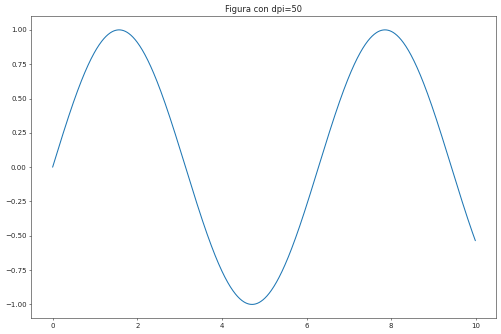

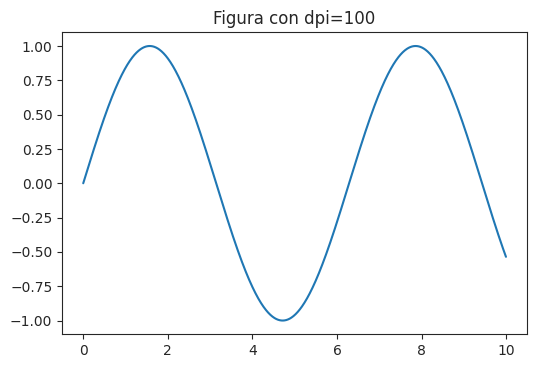

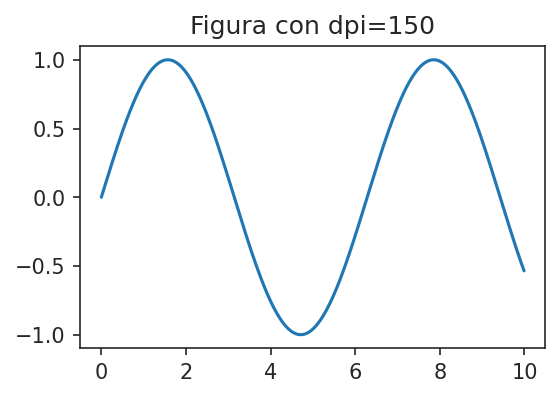

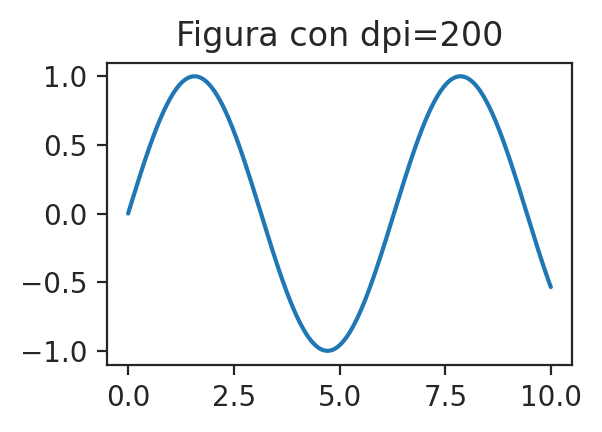

In [ ]:
x = np.arange(0,10, 0.01) #para simular una variable de tiempo, crea una secuencia de datos entre 0 y 10 con intervalo entre datos de 0.01
y = np.sin(x)

fig, ax = plt.subplots(figsize=(12,8), dpi=50)
plt.plot(x, y)
ax.set_title('Figura con dpi=50')
plt.show()

fig, ax = plt.subplots(figsize=(6,4), dpi=100)
plt.plot(x, y)
ax.set_title('Figura con dpi=100')
plt.show()

fig, ax = plt.subplots(figsize=(4,2.67), dpi=150)
plt.plot(x, y)
ax.set_title('Figura con dpi=150')
plt.show()

fig, ax = plt.subplots(figsize=(3,2), dpi=200)
plt.plot(x, y)
ax.set_title('Figura con dpi=200')
plt.show()


### Forzar a crear ejes proporcionales

En algunas ocaciones necesitamos que el tamaño de la escala de los ejes sea el mismo, por ejemplo cuando queremos representar a la vez coordenadas de ejes X e Y. Se utiliza la instrucción ax.axis('equal'), y así se evita que la gráfica parezca achatada o alargada.

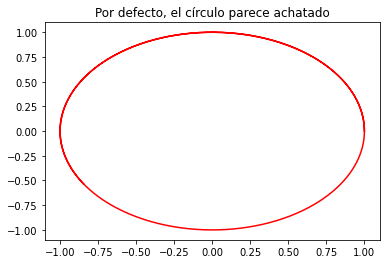

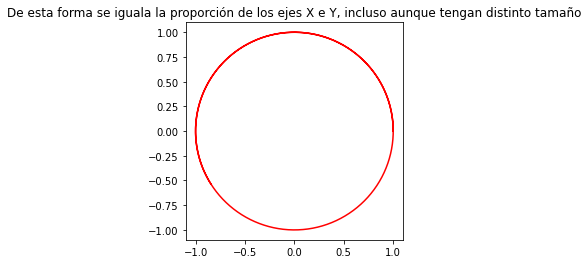

In [5]:
#creamos unos datos cualquiera que dibujarán un círculo
t = np.arange(0,10, 0.01) #esta varaible simula una medida de tiempo en segundos
xx = np.sin(t) #crea una onda seno basada en los datos de tiempo
yy= np.cos(t) #crea una onda coseno basada en los datos de tiempo

######################################
fig, ax = plt.subplots()
plt.plot(yy, xx, 'r-')
plt.title('Por defecto, el círculo parece achatado')
plt.show()

fig, ax = plt.subplots()
plt.plot(yy, xx, 'r-')
ax.axis('equal')
plt.title('De esta forma se iguala la proporción de los ejes X e Y, incluso aunque tengan distinto tamaño')
plt.show()


También puede pasar que lo que se represente en la gráfica no sea simétrico. En esos casos la figura tiende a dejar huecos en blanco por algún lado. Eso también se puede corregir con el comando *ax.set_aspect('equal', 'box')*.
Lo vemos con una figura que representa un óvalo achatado por los lados.

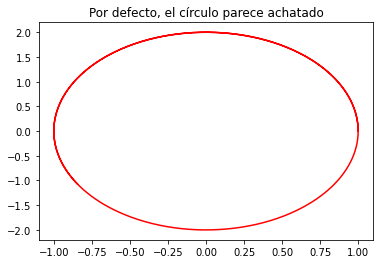

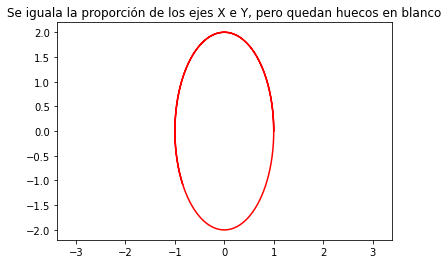

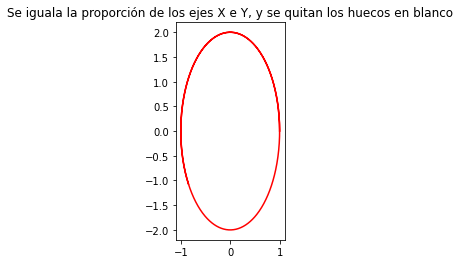

In [8]:
#creamos unos datos cualquiera que dibujarán un óvalo achatado por los lados
t = np.arange(0,10, 0.01) #esta varaible simula una medida de tiempo en segundos
xx = np.sin(t)*2 #crea una onda seno basada en los datos de tiempo
yy= np.cos(t) #crea una onda coseno basada en los datos de tiempo

######################################
fig, ax = plt.subplots()
plt.plot(yy, xx, 'r-')
plt.title('Por defecto, el óvalo queda en malas proporciones')
plt.show()

fig, ax = plt.subplots()
plt.plot(yy, xx, 'r-')
ax.axis('equal')
plt.title('Se iguala la proporción de los ejes X e Y, pero quedan huecos en blanco')
plt.show()

fig, ax = plt.subplots()
plt.plot(yy, xx, 'r-')
ax.set_aspect('equal', 'box')
plt.title('Se iguala la proporción de los ejes X e Y, y se quitan los huecos en blanco')
plt.show()

### Incluir leyenda y configurarla 

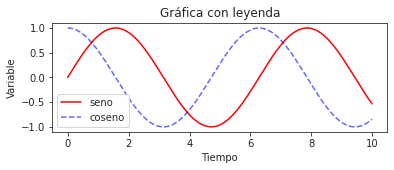

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con leyenda')
plt.legend(loc='best') #con loc se indica dónde se quiere que ponga la leyenda. 'best' para que elija la mejor posición. También puede ser 'upper left', 'lower right', etc.
plt.show()

También se puede incluir un texto concreto en la leyenda distinto del propio de las variables.

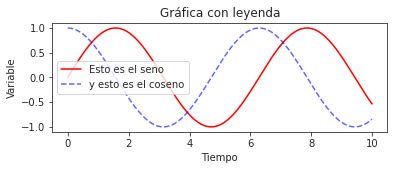

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con leyenda')
plt.legend(loc='best', labels=['Esto es el seno', 'y esto es el coseno'], frameon=True) #frameon pone o quita el rectángulo de la leyenda
plt.show()

También se puede modificar el tamaño del texto de la leyenda y de las líneas.

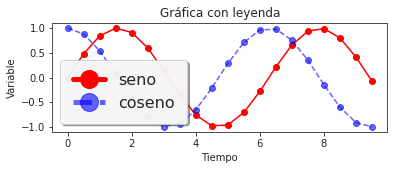

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x[::50], y[::50], 'ro-', label='seno')
plt.plot(x[::50], y2[::50], 'bo--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con leyenda')
leg=plt.legend(loc='best', frameon=True, framealpha=0.9, shadow=True, borderpad=0.8, fontsize=16, markerscale=3) #frameon pone o quita el rectángulo de la leyenda
for line in leg.get_lines():
    line.set_linewidth(5.0)

plt.show()

En algunos casos, interesa poner la leyenda fuera de los ejes.

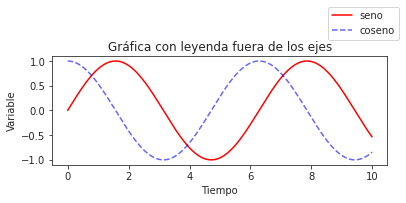

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con leyenda fuera de los ejes')
plt.legend(fontsize=10, bbox_to_anchor=(1.05,1.5), bbox_transform=ax.transAxes) #ajusta el tamaño de la letra y la posición del cuadro. Aquí por ejemplo lo coloca fuera del gráfico a la derecha
plt.show()

A veces se crean muchas líneas (por ejemplo de varias repeticiones) pero no queremos que salga en la leyenda todas, sino la agrupación general.
Por ejemplo, creamos dos grupos de variables como si fueran dos condiciones, cada una con un número de repeticiones.
Si queremos sacar la leyenda de estos datos, tenemos un problema, muestra una referencia por cada línea, saturando la gráfica.

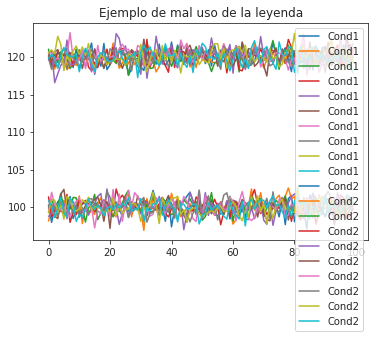

In [ ]:
numRepeticiones=10
condicion1= 100+np.random.randn(100, numRepeticiones) #datos aleatorios oscilando en torno a 100
condicion2= 120+np.random.randn(100,numRepeticiones) #datos aleatorios oscilando en torno a 120

#Mostramos la gráfica con su leyenda
fig, ax = plt.subplots()
plt.plot(condicion1, label='Cond1')
plt.plot(condicion2, label='Cond2')
plt.title('Ejemplo de mal uso de la leyenda')
plt.legend()
plt.show()



Tenemos que controlar la leyenda para que saque solamente dos referencias, una por condición. Controlando la transparencia con el parámetro alpha se pueden ver mejor las zonas de mayor solapamiento.

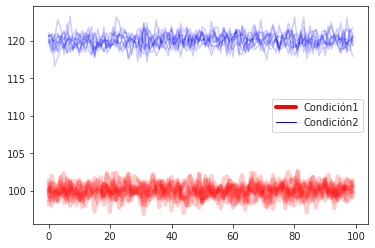

In [ ]:
from matplotlib.lines import Line2D #necesario para controlar el formato de las líneas de la leyenda
fig, ax = plt.subplots()
plt.plot(condicion1, linewidth=4, color='red', alpha=0.2) #le ponemos a cada condición un color característico
plt.plot(condicion2, color='blue', alpha=0.2)

#Creamos las líneas que queremos que salgan en la leyenda, coincidiendo con las características de las gráficas
custom_lines = [Line2D([0], [0], color='red', linewidth=4, label='Condición1'),
                Line2D([0], [0], color='blue', linewidth=1, label='Condición2')]
plt.legend(handles=custom_lines)
plt.show()

### Manipular el aspecto de los bordes y ejes

Se puede controlar completamente el formato de los ejes y las etiquetas. Fíjate en la figura para ver los elementos que han sido modificados.

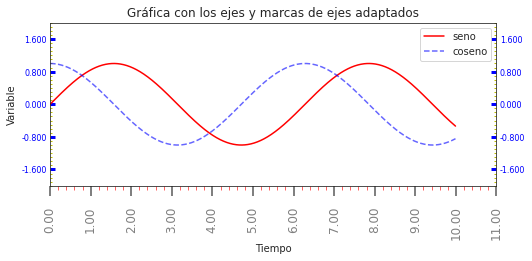

In [ ]:
#%% Ajuste de los ticks de ejes
import matplotlib.ticker as ticker #para controlar los ticks de los ejes

fig, ax = plt.subplots(figsize=(8,3))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
start, end = ax.get_xlim()#coge los límites en el eje x

#ajusta el aspecto de los ticks de los ejes
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))#ajusta decimales del eje X
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0)) #ajusta la frecuencia de los ticks major eje X. Otra opciones: ticker.NullLocator(); ticker.FixedLocator([0,1,5]); ticker.LinearLocator(3); ticker.IndexLocator(base=.5, offset=.25); ticker.AutoLocator(); ticker.MaxNLocator(4); ticker.LogLocator(base=10.0, numticks=15)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2)) #ajusta la frecuencia de los ticks minor eje X
ax.tick_params(axis='x', direction='out', length=10, width=2, colors='grey', pad=10, labelrotation=90, labelsize=12) #ajusta parámetros ticks eje X (si no se especifica, se refiere a los major)
ax.tick_params(axis='x', which='minor', length=4, color='r') #ajusta parámetros ticks minor eje X

ax.yaxis.set_major_locator(ticker.MaxNLocator(5)) #especifica el número concreto de ticks que se quiere que muestre en el eje
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f')) #ajusta decimales del eje Y
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1)) #ajusta la frecuencia de los ticks minor eje Y
ax.tick_params(axis='y', direction='in', length=5, width=3, colors='b', right=True, labelright=True, labelsize=8) #ajusta parámetros ticks major eje Y (si no se especifica, se refiere a los major)
ax.tick_params(axis='y', which='minor', direction='in', length=2, width=1, colors='y', right=True) #ajusta parámetros ticks minor eje Y

ax.set_xlim((0, 11)) #fija el tamaño de datos que abarca el eje x
ax.set_ylim((-2, 2)) #fija el tamaño de datos que abarca el eje y

ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con los ejes y marcas de ejes adaptados')
plt.legend(loc='best')
plt.show()

Se puede indicar a mano las etiquetas que queremos que aparezcan en los ejes

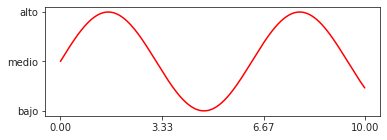

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-')

ax.set_xticks(np.linspace(0, 10, 4)) #para que ponga 4 valores numéricos
ax.set_yticks(np.linspace(-1, 1, 3)) # pone 3 ticks
ax.set_yticklabels(['bajo','medio','alto'])

plt.show()

También se pueden eliminar partes de los ejes, como las etiquetas o partes del rectángulo de los ejes.

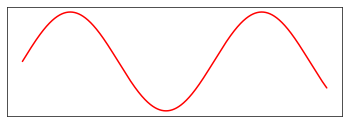

In [ ]:
#%% Quitar etiquetas y ticks de los ejes

fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-')

ax.tick_params(labelbottom=False, bottom=False, labelleft=False, left=False)#quita etiquetas y ticks
plt.show()

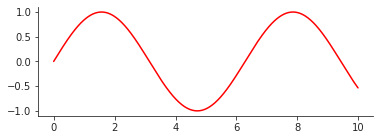

In [ ]:
#%% Quitar bordes de la figura

fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-')


ax.spines['top'].set_visible(False) #quita los bordes de uno en uno
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.show()

Y se pueden colocar los ejes en otra posición, centrada, un número respecto al tamaño de la gráfica (de 0.0 a 1.0) o respecto a los propios datos.

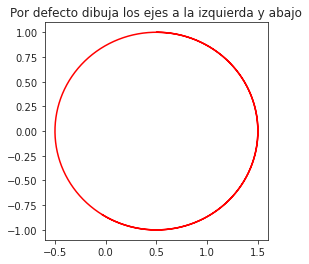

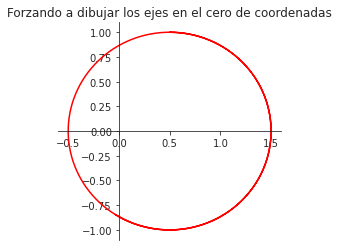

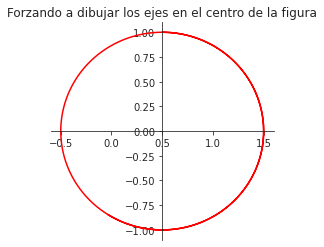

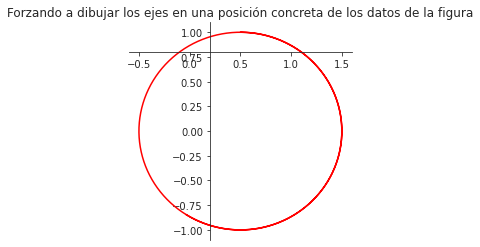

In [ ]:
#creamos unos datos cualquiera que dibujarán un círculo
t = np.arange(0,10, 0.01) #esta varaible simula una medida de tiempo en segundos
xx = np.sin(t)+0.5 #crea una onda seno basada en los datos de tiempo y le suma 1 para desplazarla a la derecha en el eje X
yy= np.cos(t) #crea una onda coseno basada en los datos de tiempo

######################################
fig, ax = plt.subplots(figsize=(4,4))
plt.plot(xx, yy, 'r-')
plt.title('Por defecto dibuja los ejes a la izquierda y abajo')
plt.show()

######################################
fig, ax = plt.subplots(figsize=(4,4))
plt.plot(xx, yy, 'r-')

#Fuerza a poner el eje en la posición cero de los datos
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

#Quita bordes derecho y superior para que quede más visible
ax.spines['top'].set_visible(False) #quita los bordes de uno en uno
ax.spines['right'].set_visible(False)
plt.title('Forzando a dibujar los ejes en el cero de coordenadas')
plt.show()

######################################
fig, ax = plt.subplots(figsize=(4,4))
plt.plot(xx, yy, 'r-')
#Fuerza a poner el eje en la posición cero de los datos
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

#Quita bordes derecho y superior para que quede más visible
ax.spines['top'].set_visible(False) #quita los bordes de uno en uno
ax.spines['right'].set_visible(False)
plt.title('Forzando a dibujar los ejes en el centro de la figura')
plt.show()


######################################
fig, ax = plt.subplots(figsize=(4,4))
plt.plot(xx, yy, 'r-')
#Fuerza a poner el eje en la posición cero de los datos
ax.spines['left'].set_position(('data', 0.2))
ax.spines['bottom'].set_position(('data', 0.8))

#Quita bordes derecho y superior para que quede más visible
ax.spines['top'].set_visible(False) #quita los bordes de uno en uno
ax.spines['right'].set_visible(False)
plt.title('Forzando a dibujar los ejes en una posición concreta de los datos de la figura')
plt.show()


### Gráficas con doble eje

En ocasiones necesitamos representar en una misma gráfica más de una variable que tienen escalas muy distintas. Si las representáramos con la misma escala, las que son más pequeñas no se apreciarían.

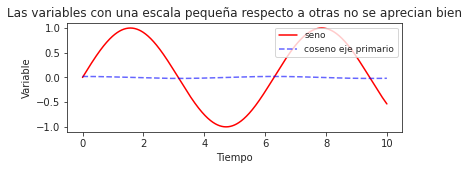

In [ ]:
#1- Datos distintos con distinta escala
x2 = np.arange(0,10, 0.01)
y2 = np.sin(x2)
y3= np.cos(x2)/50 #reducimos la escala

#Dibujando con el mismo eje no se aprecia bien la escala más pequeña
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x2, y2, 'r-', label='seno')
ax.plot(x2, y3, 'b--', alpha=0.6, label='coseno eje primario')#sobre el eje de la izquierda

ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Las variables con una escala pequeña respecto a otras no se aprecian bien')

fig.legend(fontsize=9, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)#en este caso la leyenda hay que ponerla así para que incluya los dos ejes
plt.show()

Para mejorar la representación podemos crear un nuevo eje en la gráfica y elegir qué variables queremos representar en ese eje.

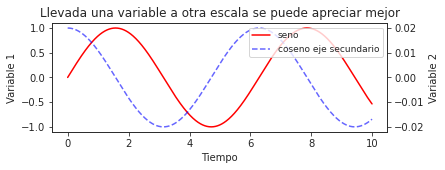

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x2, y2, 'r-', label='seno')

ax2 = ax.twinx() #crea el segundo eje
ax2.plot(x2, y3, 'b--', alpha=0.6, label='coseno eje secundario')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable 1')
ax2.set_ylabel('Variable 2')
ax.set_title('Llevada una variable a otra escala se puede apreciar mejor')

fig.legend(fontsize=9, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes) #en este caso la leyenda hay que ponerla así para que incluya los dos ejes
plt.show()

También se pueden incluir más ejes

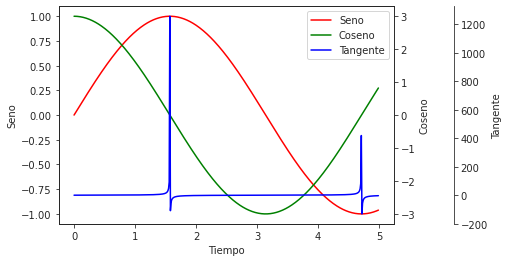

In [ ]:
#Primero creamos datos de ejemplo para tres variables
t = np.arange(0,5, 0.01)
x3 = np.sin(t)
y3= np.cos(t)*3
z3= np.tan(t)

fig, ax = plt.subplots() #ax es el eje principal

ax1 = ax.twinx() #eje secundario
ax2 = ax.twinx() #segundo eje secundario

#Dibuja las gráficas de cada variable
p1, = ax.plot(t, x3, color='r',label='Seno')
p2, = ax1.plot(t,y3, color='g', label='Coseno')
p3, = ax2.plot(t,z3 , color='b', label='Tangente')

#Incluye títulos de cada eje
ax.set_xlabel("Tiempo")
ax.set_ylabel("Seno")
ax1.set_ylabel("Coseno")
ax2.set_ylabel("Tangente")

ax.legend(handles=[p1, p2, p3], loc='best') #también se puede hacer así para que muestre la leyenda de todas las líneas


ax2.spines['right'].set_position(('outward', 60)) #aleja hacia la derecha el eje 3
ax2.spines["right"].set_visible(True) #estos tres enprincipio no parecen necesarios
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

plt.show()


También se puede representar la misma gráfica con dos escalas diferentes, una a cada lado. Esto viene bien por ejemplo al presentar una misma magnitud en dos unidades o escalas distintas.

En el siguiente ejemplo, se muestra la fuerza en unidades absolutas (newtons) y en unidades relativas (veces el peso corporal o Body Weight).

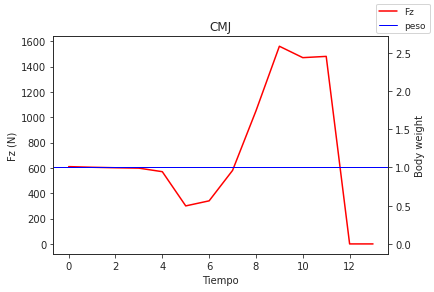

In [ ]:
Fz=np.array([610, 605, 601, 598, 570, 300, 340, 580, 1050, 1560, 1470, 1480, 0, 0]) #datos aproximados para simular rápido un salto con contramovimiento
peso=Fz[0:4].mean()

fig, ax = plt.subplots()
ax.plot(Fz, 'r-', label='Fz')
ax.axhline(y=peso, lw=1, color='b', label='peso') #marca la línea del peso

ax.set_xlabel('Tiempo')
ax.set_ylabel('Fz (N)')
ax.set_title('CMJ')

ax2 = ax.twinx() #crea el segundo eje
minY, maxY = ax.get_ylim()#toma el máximo y mínimo de la escala del eje primario (en este caso la fuerza en newtons)
ax2.set_ylim(minY/peso, maxY/peso) #ajusta el máx y mín del eje secundario según la escala de fuerza normalizada
ax2.set_ylabel('Body weight')

fig.legend(fontsize=9)
plt.show()

### Realizar anotaciones de texto en las gráficas
Se pueden realizar anotaciones de textoincluyendo o no flechas de distinto tipo y estilos.

La posición de los elementos se puede controlar indicando las coordenadas respecto a los ejes de los datos en sus mismas unidades, respecto al tamaño de la figura o respecto al tamaño de los ejes de la gráfica. Según el caso puede interesar una u otra opción.

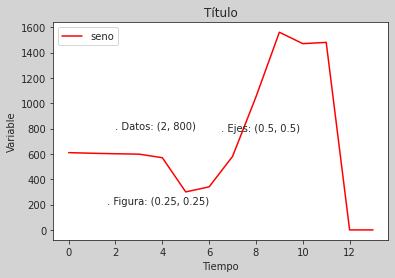

In [ ]:
Fz=np.array([610, 605, 601, 598, 570, 300, 340, 580, 1050, 1560, 1470, 1480, 0, 0]) #datos aproximados para simular rápido un salto con contramovimiento
#%% Incluir anotaciones de texto sencillas
fig, ax = plt.subplots(figsize=(6,4), facecolor='lightgray') #facecolor cambia el color de los bordes de la figura
plt.plot(Fz, 'r-', label='seno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Título')
plt.legend(loc='best')

# para situar el texto en la figura, se pueden usar coordenadas de los datos de la gráfica, de los ejes o de la figura.
ax.text(2, 800, '. Datos: (2, 800)', transform=ax.transData)
ax.text(0.5, 0.5, '. Ejes: (0.5, 0.5)', transform=ax.transAxes) #proporción al tamaño de los ejes o axes, que es el cuadrado que aquí se ve blanco. (0,0) es la esquina inferior izquierda de la parte blanca. (1,1) es la esquina superior derecha.
ax.text(0.25, 0.25, '. Figura: (0.25, 0.25)', transform=fig.transFigure); #proporción al tamaño de la figura, que es el cuadrado que aquí se ve gris. (0,0) es la esquina inferior izquierda de la parte gris.

plt.show()

Se pueden incluir flechas para señalar puntos concretos.

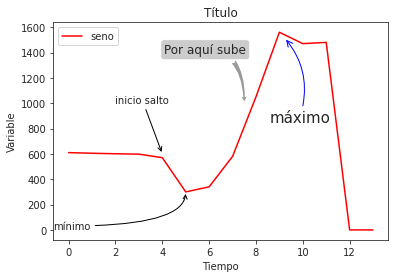

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(Fz, 'r-', label='seno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Título')
plt.legend(loc='best')


ax.annotate('inicio salto',
            xy=(4, 600), xycoords='data',
            xytext=(2, 1000), textcoords='data',
            arrowprops=dict(arrowstyle='->', color='black')) #arrowprops indica el estilo de la flecha. Por defecto es recta


ax.annotate('mínimo',
            xy=(5, 300), xycoords='data',
            xytext=(0, 0.05), textcoords='axes fraction', #en este caso, las coordenadas del texto son relativas al tamaño del cuadro de los ejes (de 0 a 1)
            arrowprops=dict(arrowstyle='->', color='black', connectionstyle='angle3,angleA=0,angleB=90')) #con algle3 se puede especificar el ángulo de la flecha al inicio y al final

#Ahora vamos a crear una flecha que apunte automáticamente al valor máximo sin necesidad de buscarlo a mano
Fzmax = np.max(Fz)
indiceFzmax = np.where(Fz==Fzmax)[0] #esto busca la posición del máximo en el array 
ax.annotate('máximo',
            xy=(indiceFzmax, Fzmax), xycoords='data', #pasa directamente la posición y el valor de fuerza que habíamos buscado
            xytext=(-10, -90), textcoords='offset points', #ahora coloca el texto a una distancia respecto a la punta de la flecha
            fontsize=15, 
            arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=0.3', #con arc3 genera una curva con el radio que se indique
            shrinkB=10)) #margen de la punta de la flecha respecto al objetivo. Si no se pone una distancia, se confunde la punta de la flecha con los datos

#También se pueden crear anotaciones de fantasía
ax.annotate('Por aquí sube', xy=(7.5, 1000),  xycoords='data',
            xytext=(-80, 50), textcoords='offset points',
            fontsize=12,
            bbox=dict(boxstyle="round", fc='0.8'), #configura el aspecto del recuadro del texto
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()

Se pueden encontrar más características de configuración de flechas en la [página de Matplotlib](https://matplotlib.org/users/annotations.html)

### Destacar áreas en las gráficas

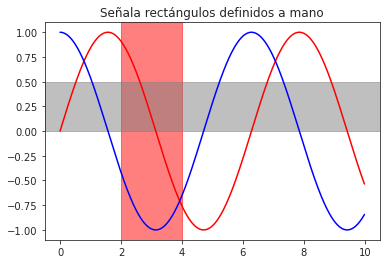

In [ ]:
#%% DESTACAR ÁREAS
x = np.arange(0,10, 0.01)
y = np.sin(x)
y2= np.cos(x)


#Rectángulos en zonas concretas
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

ax.axvspan(2, 4, alpha=0.5, color='r') #crea un rectángulo vertical delimitado a mano
ax.axhspan(0, 0.5, alpha=0.5, color='gray') #crea un rectángulo horizontal delimitado a mano
plt.title('Señala rectángulos definidos a mano')
plt.show()


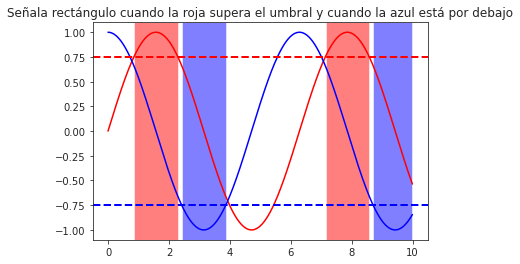

In [ ]:
#Rectángulos dependientes con condicional de la variable
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

umbral=0.75
ax.axhline(umbral, color='r', linestyle='--', lw=2)
ax.axhline(-umbral, color='b', linestyle='--', lw=2)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes) #controla la referencia de las medidas de los ejes (transData en coordenadas de las variables, transAxes en coordenadas de los ejes (entre 0 y 1))
ax.fill_between(x, 0, 1, where=y > umbral, facecolor='r', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y2 < -umbral, facecolor='b', alpha=0.5, transform=trans)
plt.title('Señala rectángulo cuando la roja supera el umbral y cuando la azul está por debajo')
plt.show()

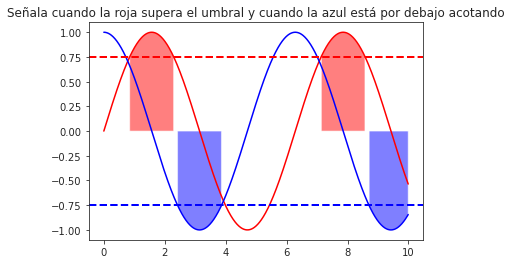

In [ ]:
#Como el anterior pero en lugar de un rectángulo, marca el área entre cero y la variable
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

umbral=0.75
ax.axhline(umbral, color='r', linestyle='--', lw=2)
ax.axhline(-umbral, color='b', linestyle='--', lw=2)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transData)
ax.fill_between(x, 0, y, where=y > umbral, facecolor='r', alpha=0.5, transform=trans)
ax.fill_between(x, y2, 0, where=y2 < -umbral, facecolor='b', alpha=0.5, transform=trans)
plt.title('Señala cuando la roja supera el umbral y cuando la azul está por debajo acotando')
plt.show()


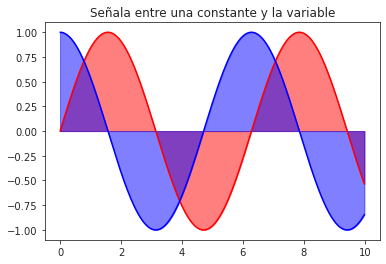

In [ ]:
#Áreas de las gráficas, entre constante y gráfica
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

ax.fill_between(x, 0, y, color='r', alpha=0.5) #entre el cero y variable y
ax.fill_between(x, 0, y2, color='b', alpha=0.5) #entre el cero y variable y
plt.title('Señala entre una constante y la variable')
plt.show()


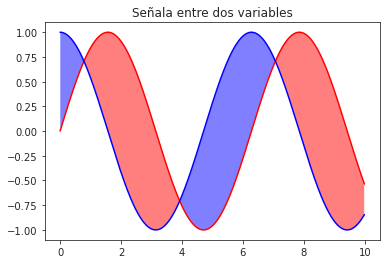

In [ ]:
#Áreas de las gráficas, entre dos gráficas
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

ax.fill_between(x, y, y2, where=y2 >= y, facecolor='b', alpha=0.5, interpolate=True)
ax.fill_between(x, y, y2, where=y2 <= y, facecolor='r', alpha=0.5, interpolate=True)
plt.title('Señala entre dos variables')
plt.show()


## Crear varias gráficas dentro de la misma figura (subplots)

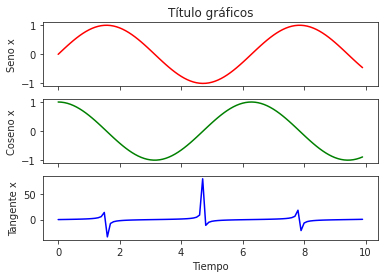

In [ ]:
#%% CREAR VARIOS SUBPLOTS EN UNA MISMA FIGURA
x4 = np.arange(0, 10, 0.1)
y41 = np.sin(x4)
y42 = np.cos(x4)
y43 = np.tan(x4)


fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)#se puede simplificar como plt.subplots(1, 2)
ax[0].plot(x4, y41, 'r')
ax[1].plot(x4, y42, 'g')
ax[2].plot(x4, y43, 'b')

ax[0].set_ylabel('Seno x')
ax[1].set_ylabel('Coseno x')
ax[2].set_ylabel('Tangente x')


ax[2].set_xlabel('Tiempo')

ax[0].set_title('Título gráficos')

plt.show()


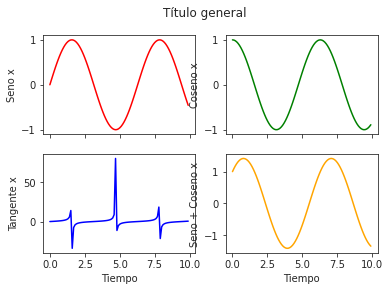

In [ ]:
#%% CREAR VARIOS SUBPLOTS EN UNA MISMA FIGURA
x4 = np.arange(0, 10, 0.1)
y41 = np.sin(x4)
y42 = np.cos(x4)
y43 = np.tan(x4)


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)#se puede simplificar como plt.subplots(2, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
#
ax[1,0].set_xlabel('Tiempo')
ax[1,1].set_xlabel('Tiempo')
#
#ax[0].set_title('Título gráficos')

plt.suptitle('Título general')#título de toda la figura

plt.show()

Fíjate en que los títulos de eje se solapan con las gráficas que quedan a los lados. Para evitarlo, se pone la instrucción plt.tight_layout() para que ajuste automáticamente los espacios.

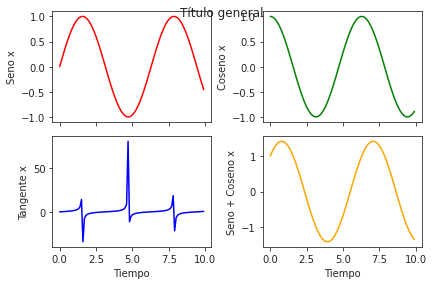

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)#se puede simplificar como plt.subplots(1, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
#
ax[1,0].set_xlabel('Tiempo')
ax[1,1].set_xlabel('Tiempo')
#
#ax[0].set_title('Título gráficos')

plt.suptitle('Título general')#título de toda la figura
plt.tight_layout() #ajusta automáticamente los espacios entre gráficas
plt.show()

Como ahora ha puesto el título general muy pegado a las gráficas, podemos cambiar el tamaño del área de los ejes para alejarlo lo que queramos con la misma instrucción plt.tight_layout() modificada.

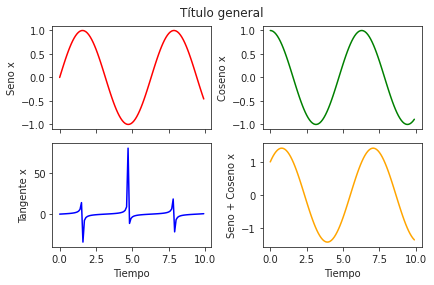

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)#se puede simplificar como plt.subplots(1, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
#
ax[1,0].set_xlabel('Tiempo')
ax[1,1].set_xlabel('Tiempo')
#
#ax[0].set_title('Título gráficos')

plt.suptitle('Título general')#título de toda la figura

plt.tight_layout(rect=[0, 0, 1, 0.95])#rect permite ajustar el tamaño de la zona de las gráficas.
                                      # los 4 números corresponden a: x izquierda, y abajo, x derecha, y arriba
                                      #En este caso se dice que ocupe todo el espacio pero la parte superior se quede un poco por debajo para dejar espacio al título general.
plt.show()

A veces no es relevante o no se conoce la estructura de las variables que se representan porque no es eficaz colocarlas por filas y columnas, sino que simplemente interesa ir representándolas en orden lineal. Se irán colocando por orden rellenando filas.

Esto es útil por ejemplo cuando vamos representando las variables de todos los archivos de una carpeta, y no se sabe exactamente cuantos puede haber pero queremos que se vean todos en una misma figura.

En este caso, vamos a crear un conjunto de datos compuestos por unas cuantas variables. Queremos que se muestren en gráficas separadas en una cuadrícula de 3 filas y 4 columnas por ejemplo.

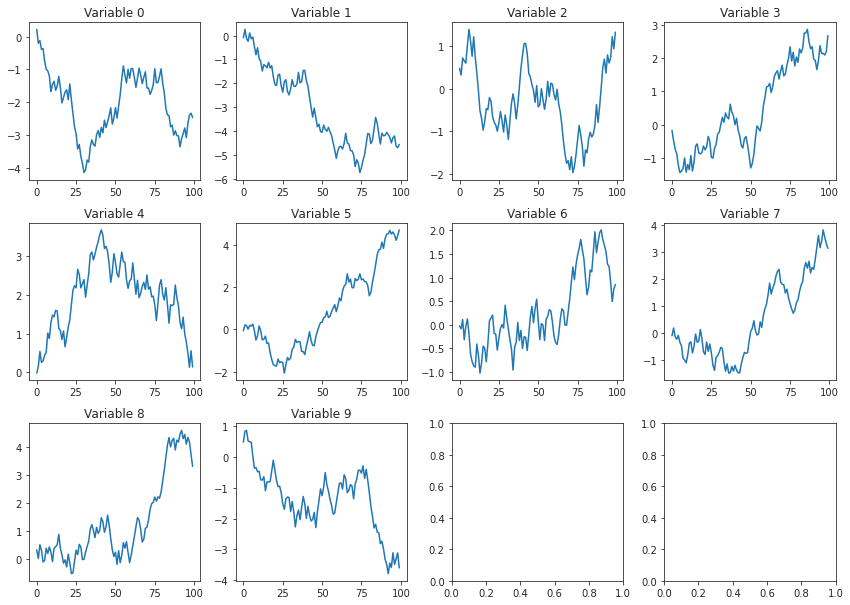

In [ ]:
#Creamos los datos
numDatos=100
numVariables=10
caminos = (np.random.random([numDatos, numVariables])-0.5).cumsum(axis=0)

#Crea una figura general
fig, axs = plt.subplots(3, 4, constrained_layout=True, figsize=(11.7, 8.3)) #tamaño A4

#inicia un bucle for que recorre todas las variables
for var in range(numVariables):
  axs.flat[var].plot(caminos[:, var])
  axs.flat[var].set_title('Variable '+str(var))

plt.show()

### Ajuste de la proporción de tamaño de cada subplot

Se puede modificar el ratio del tamaño de las gráficas, en ancho...

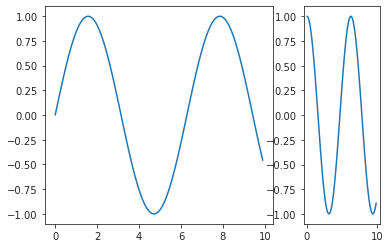

In [ ]:
fig, ax = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]}) #crea 2 subplots, el de la izquierda tres veces más ancho
ax[0].plot(x4, y41)
ax[1].plot(x4, y42)
plt.show()

...y en alto...

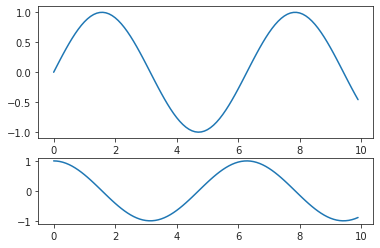

In [ ]:
fig, ax = plt.subplots(2,1, gridspec_kw = {'height_ratios':[2, 1]}) #crea 2 subplots, el de la arriba dos veces más alto
ax[0].plot(x4, y41)
ax[1].plot(x4, y42)
plt.show()

...y los dos a la vez

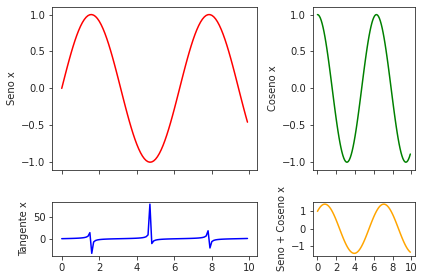

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, gridspec_kw = {'height_ratios':[3, 1], 'width_ratios':[2, 1]})#se puede simplificar como plt.subplots(1, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
plt.tight_layout()
plt.show()

### Para controlar con detalle la distribución de varios grupos de gráficas

Se puede usar el módulo gridspec.

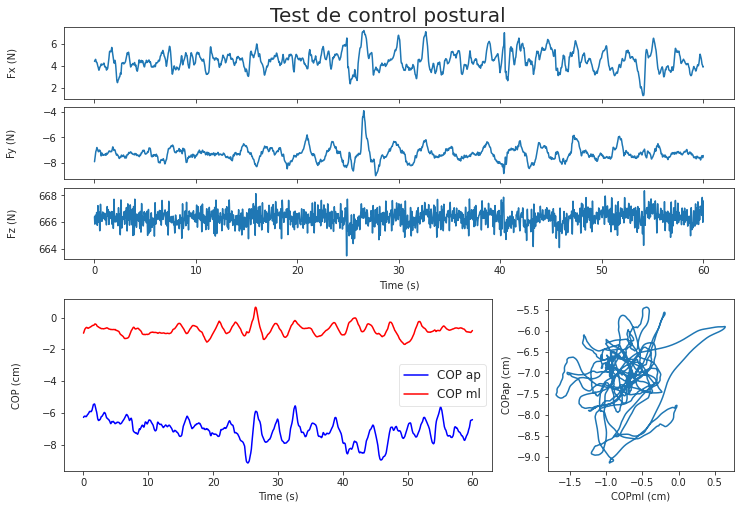

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec #para distribuir subplots en una misma figura

#Carga datos de ejemplo de un test de control postural
url='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/PlatFuerzas/COP/OtroTipoPlat-COP.txt'

Datos = pd.read_csv(url, delimiter='\t', skiprows=1, header=None,
                  names=['Time','Fx','Fy','Fz','Mx','My','Mz','COPx','COPy'])

fig=plt.figure(figsize=(12, 7))
gs1 = gridspec.GridSpec(3, 1) #crea un primer subgrupo de gráficas, donde se va a meter 3 filas y una columna, para las 3 fuerzas
gs1.update(bottom=0.50, top=0.96, hspace=0.12, wspace=.1) #bottom=.50 significa que ocupa a partir de la mitad vertical de toda la figura. hspace es la separación vertical entre las gráficas del mismo bloque.

ax1, ax2, ax3 = plt.subplot(gs1[0]), plt.subplot(gs1[1]), plt.subplot(gs1[2])
#gs1.tight_layout(fig, rect=[0.0, 0.50, 1.0, 0.96])

gs2 = gridspec.GridSpec(3, 3) #crea otro subgrupo de 3 filas y 3 columnas
gs2.update(bottom=0.08, top=0.42, wspace=0.3)
ax4, ax5 = plt.subplot(gs2[:, :-1]), plt.subplot(gs2[:, 2])

ax1.set_ylabel('Fx (N)')
ax1.set_xticklabels([]), ax1.locator_params(axis='y', nbins=4)
ax1.yaxis.set_label_coords(-.07, 0.5)
ax2.set_ylabel('Fy (N)')
ax2.set_xticklabels([]), ax2.locator_params(axis='y', nbins=4)
ax2.yaxis.set_label_coords(-.07, 0.5)
ax3.set_ylabel('Fz (N)')
ax3.locator_params(axis='y', nbins=4)
ax3.yaxis.set_label_coords(-.07, 0.5)
ax3.set_xlabel('Time (s)')

ax4.set_xlabel('Time (s)')
ax4.set_ylabel('COP (cm)')
ax5.set_xlabel('COPml (cm)')
ax5.set_ylabel('COPap (cm)')

ax1.plot(Datos['Time'], Datos['Fx'])
ax2.plot(Datos['Time'], Datos['Fy'])
ax3.plot(Datos['Time'], Datos['Fz'])
ax4.plot(Datos['Time'], Datos['COPx'], 'b', label='COP ap')
ax4.plot(Datos['Time'], Datos['COPy'], 'r', label='COP ml')
ax4.yaxis.set_label_coords(-.1, 0.5)
ax4.legend(fontsize=12, loc='best', framealpha=.5)
ax5.plot(Datos['COPy'], Datos['COPx'])
ax5.locator_params(axis='both', nbins=10)

plt.suptitle('Test de control postural', fontsize=20, y=1)
plt.show()

## Crear gráficas dentro de otras gráficas (zoom de una zona)

Se puede apliar una zona específica de la gáfica y que se vea dentro de la misma gráfica para mantener la visión de conjunto.

Lo probamos con datos fuerzas verticales de un aterrizaje tras un salto. Ampliamos la parte donde se produce el primer impacto.

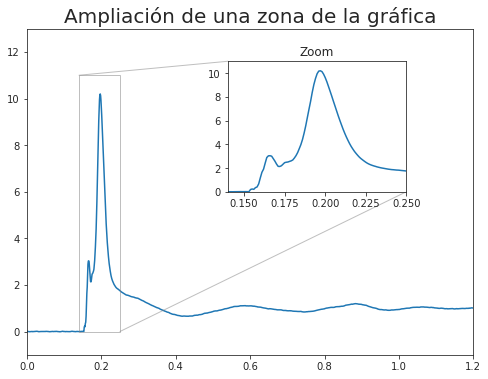

In [ ]:
#Datos de ejemplo de un aterrizaje tras salto. Normalmente los saríamos de un archivo, pero por simplificar aquí ponemos los datos directamente.
Fz=np.array([0.007, 0.008, 0.003, 0.001, -0.002, -0.003, -0.009, -0.009, -0.007, -0.003, -0.001, 0.002, 0.002, 0.001, 0.001, -0.006, -0.005, -0.003, -0.001, -0.001, -0.003, -0.002, -0.001, 0.003, 0.006, 0.009, 0.007, 0.009, 0.008, 0.001, -0.003, -0.002, -0.009, -0.006, -0.005, -0.005, -0.003, -0.001, 0.001, 0.000, 0.000, 0.001, 0.000, -0.003, 0.001, 0.001, -0.001, -0.001, -0.003, -0.002, 0.001, 0.006, 0.006, 0.007, 0.009, 0.003, -0.001, 0.001, -0.004, -0.003, -0.007, -0.009, -0.010, -0.005, -0.006, -0.003, -0.003, 0.001, 0.002, 0.003, -0.001, -0.003, 0.001, 0.002, 0.000, 0.001, 0.005, 0.001, 0.004, 0.007, 0.003, -0.001, -0.002, 0.001, -0.005, -0.004, -0.006, -0.007, -0.013, -0.007, -0.009, -0.005, 0.001, 0.003, 0.004, 0.011, 0.011, 0.003, 0.000, 0.003, 0.001, 0.003, -0.001, -0.002, -0.007, -0.001, -0.001, -0.003, -0.002, 0.002, -0.001, -0.005, -0.006, -0.007, -0.009, -0.006, -0.005, -0.006, -0.001, 0.007, 0.006, 0.008, 0.009, 0.008, 0.003, 0.003, -0.001, -0.001, -0.003, -0.007, -0.007, -0.007, -0.003, 0.002, 0.002, 0.002, 0.003, -0.003, -0.003, -0.004, -0.007, -0.003, -0.001, -0.003, 0.000, 0.001, 0.003, 0.005, 0.007, 0.004, 0.005, 0.008, 0.004, 0.003, 0.189, 0.230, 0.202, 0.343, 0.399, 0.658, 1.164, 1.637, 1.902, 2.405, 2.884, 3.025, 3.035, 2.995, 2.787, 2.578, 2.333, 2.137, 2.129, 2.189, 2.320, 2.452, 2.486, 2.505, 2.555, 2.601, 2.675, 2.842, 3.042, 3.299, 3.630, 3.971, 4.404, 4.948, 5.563, 6.264, 6.957, 7.630, 8.380, 9.034, 9.542, 9.947, 10.168, 10.196, 10.127, 9.909, 9.619, 9.273, 8.877, 8.476, 8.068, 7.645, 7.234, 6.819, 6.407, 6.016, 5.643, 5.274, 4.936, 4.622, 4.332, 4.058, 3.814, 3.601, 3.400, 3.228, 3.067, 2.918, 2.794, 2.687, 2.583, 2.485, 2.399, 2.328, 2.269, 2.219, 2.174, 2.135, 2.092, 2.058, 2.025, 1.997, 1.973, 1.948, 1.923, 1.900, 1.882, 1.864, 1.854, 1.840, 1.826, 1.820, 1.806, 1.790, 1.776, 1.762, 1.747, 1.737, 1.721, 1.708, 1.697, 1.687, 1.678, 1.667, 1.655, 1.647, 1.636, 1.627, 1.615, 1.603, 1.593, 1.585, 1.576, 1.566, 1.566, 1.563, 1.557, 1.557, 1.552, 1.544, 1.541, 1.533, 1.526, 1.519, 1.511, 1.506, 1.499, 1.497, 1.491, 1.488, 1.484, 1.482, 1.477, 1.476, 1.472, 1.461, 1.453, 1.453, 1.445, 1.441, 1.436, 1.437, 1.432, 1.432, 1.429, 1.421, 1.415, 1.409, 1.398, 1.385, 1.384, 1.372, 1.360, 1.353, 1.343, 1.335, 1.330, 1.327, 1.318, 1.307, 1.300, 1.293, 1.279, 1.271, 1.261, 1.252, 1.245, 1.237, 1.228, 1.220, 1.216, 1.210, 1.200, 1.194, 1.188, 1.177, 1.166, 1.159, 1.149, 1.144, 1.133, 1.126, 1.117, 1.115, 1.108, 1.100, 1.095, 1.089, 1.078, 1.074, 1.065, 1.057, 1.049, 1.042, 1.033, 1.023, 1.023, 1.017, 1.010, 1.010, 1.002, 0.992, 0.986, 0.971, 0.961, 0.954, 0.946, 0.937, 0.928, 0.922, 0.917, 0.909, 0.901, 0.897, 0.890, 0.887, 0.882, 0.874, 0.866, 0.863, 0.855, 0.847, 0.840, 0.833, 0.831, 0.827, 0.823, 0.817, 0.808, 0.802, 0.788, 0.779, 0.777, 0.769, 0.762, 0.756, 0.750, 0.743, 0.740, 0.740, 0.734, 0.734, 0.734, 0.732, 0.724, 0.723, 0.714, 0.713, 0.706, 0.699, 0.694, 0.692, 0.692, 0.691, 0.685, 0.684, 0.683, 0.677, 0.670, 0.669, 0.663, 0.663, 0.660, 0.655, 0.658, 0.659, 0.662, 0.663, 0.664, 0.661, 0.663, 0.659, 0.659, 0.656, 0.657, 0.658, 0.655, 0.656, 0.654, 0.656, 0.655, 0.659, 0.663, 0.664, 0.664, 0.663, 0.660, 0.661, 0.660, 0.661, 0.662, 0.665, 0.671, 0.676, 0.683, 0.688, 0.688, 0.696, 0.695, 0.694, 0.697, 0.701, 0.703, 0.699, 0.700, 0.702, 0.708, 0.711, 0.717, 0.721, 0.725, 0.725, 0.724, 0.725, 0.728, 0.728, 0.737, 0.739, 0.744, 0.754, 0.762, 0.768, 0.775, 0.780, 0.783, 0.786, 0.784, 0.788, 0.790, 0.792, 0.789, 0.792, 0.798, 0.805, 0.809, 0.812, 0.817, 0.822, 0.824, 0.828, 0.827, 0.832, 0.839, 0.844, 0.849, 0.851, 0.858, 0.861, 0.870, 0.875, 0.875, 0.878, 0.883, 0.883, 0.882, 0.881, 0.882, 0.884, 0.889, 0.892, 0.897, 0.902, 0.907, 0.913, 0.913, 0.916, 0.921, 0.920, 0.924, 0.929, 0.935, 0.935, 0.942, 0.947, 0.953, 0.959, 0.968, 0.971, 0.976, 0.979, 0.977, 0.977, 0.982, 0.988, 0.989, 0.992, 0.993, 0.998, 1.004, 1.010, 1.017, 1.021, 1.025, 1.033, 1.032, 1.038, 1.042, 1.046, 1.048, 1.051, 1.057, 1.061, 1.069, 1.076, 1.072, 1.076, 1.076, 1.075, 1.074, 1.076, 1.078, 1.082, 1.080, 1.080, 1.081, 1.084, 1.088, 1.090, 1.094, 1.099, 1.104, 1.103, 1.105, 1.104, 1.103, 1.104, 1.101, 1.102, 1.108, 1.109, 1.112, 1.112, 1.107, 1.109, 1.104, 1.100, 1.101, 1.101, 1.101, 1.100, 1.097, 1.097, 1.098, 1.100, 1.102, 1.104, 1.106, 1.107, 1.105, 1.102, 1.096, 1.096, 1.095, 1.088, 1.083, 1.088, 1.088, 1.088, 1.082, 1.080, 1.077, 1.076, 1.070, 1.067, 1.066, 1.063, 1.054, 1.053, 1.049, 1.048, 1.046, 1.048, 1.044, 1.046, 1.046, 1.043, 1.036, 1.030, 1.029, 1.025, 1.019, 1.016, 1.014, 1.013, 1.010, 1.008, 1.007, 1.002, 0.999, 0.995, 0.991, 0.986, 0.981, 0.977, 0.973, 0.970, 0.975, 0.976, 0.980, 0.977, 0.979, 0.977, 0.974, 0.970, 0.968, 0.964, 0.963, 0.959, 0.953, 0.951, 0.946, 0.947, 0.947, 0.947, 0.948, 0.944, 0.940, 0.936, 0.933, 0.930, 0.930, 0.929, 0.929, 0.931, 0.932, 0.934, 0.931, 0.931, 0.928, 0.930, 0.925, 0.920, 0.916, 0.913, 0.908, 0.904, 0.902, 0.903, 0.902, 0.905, 0.906, 0.900, 0.901, 0.901, 0.894, 0.890, 0.892, 0.892, 0.888, 0.889, 0.892, 0.889, 0.892, 0.892, 0.886, 0.892, 0.891, 0.886, 0.883, 0.880, 0.879, 0.874, 0.870, 0.873, 0.869, 0.869, 0.869, 0.866, 0.866, 0.868, 0.866, 0.864, 0.860, 0.862, 0.860, 0.862, 0.858, 0.857, 0.856, 0.859, 0.864, 0.860, 0.860, 0.862, 0.853, 0.849, 0.846, 0.841, 0.842, 0.842, 0.838, 0.837, 0.839, 0.839, 0.840, 0.842, 0.843, 0.848, 0.848, 0.851, 0.852, 0.850, 0.856, 0.855, 0.853, 0.857, 0.859, 0.862, 0.866, 0.864, 0.867, 0.869, 0.867, 0.867, 0.870, 0.871, 0.873, 0.871, 0.879, 0.883, 0.888, 0.896, 0.899, 0.903, 0.910, 0.914, 0.914, 0.917, 0.921, 0.924, 0.927, 0.931, 0.931, 0.939, 0.943, 0.946, 0.948, 0.951, 0.957, 0.956, 0.961, 0.962, 0.964, 0.965, 0.967, 0.972, 0.975, 0.986, 0.989, 0.993, 1.000, 1.005, 1.005, 1.006, 1.010, 1.013, 1.014, 1.019, 1.019, 1.023, 1.026, 1.028, 1.031, 1.033, 1.038, 1.035, 1.032, 1.037, 1.034, 1.033, 1.036, 1.037, 1.037, 1.045, 1.050, 1.052, 1.061, 1.061, 1.065, 1.065, 1.066, 1.067, 1.067, 1.070, 1.068, 1.066, 1.068, 1.076, 1.074, 1.078, 1.081, 1.084, 1.084, 1.084, 1.084, 1.085, 1.090, 1.093, 1.095, 1.102, 1.113, 1.114, 1.122, 1.129, 1.131, 1.135, 1.138, 1.139, 1.141, 1.144, 1.147, 1.143, 1.143, 1.153, 1.157, 1.160, 1.165, 1.171, 1.171, 1.176, 1.174, 1.170, 1.176, 1.178, 1.180, 1.182, 1.188, 1.192, 1.194, 1.196, 1.195, 1.192, 1.195, 1.194, 1.187, 1.185, 1.184, 1.177, 1.171, 1.169, 1.173, 1.172, 1.173, 1.172, 1.167, 1.164, 1.163, 1.153, 1.149, 1.149, 1.145, 1.141, 1.141, 1.134, 1.133, 1.135, 1.127, 1.127, 1.123, 1.120, 1.109, 1.101, 1.097, 1.088, 1.081, 1.077, 1.073, 1.065, 1.063, 1.061, 1.054, 1.046, 1.044, 1.037, 1.032, 1.026, 1.024, 1.020, 1.016, 1.012, 1.008, 1.008, 1.006, 1.000, 0.998, 0.994, 0.988, 0.983, 0.971, 0.970, 0.960, 0.956, 0.953, 0.947, 0.944, 0.945, 0.941, 0.942, 0.940, 0.942, 0.939, 0.934, 0.932, 0.932, 0.930, 0.923, 0.924, 0.925, 0.926, 0.928, 0.927, 0.928, 0.922, 0.920, 0.916, 0.911, 0.911, 0.914, 0.909, 0.911, 0.910, 0.909, 0.911, 0.915, 0.917, 0.923, 0.924, 0.926, 0.926, 0.922, 0.925, 0.924, 0.926, 0.927, 0.927, 0.932, 0.937, 0.939, 0.940, 0.939, 0.942, 0.942, 0.939, 0.942, 0.947, 0.945, 0.943, 0.945, 0.949, 0.949, 0.955, 0.959, 0.965, 0.969, 0.973, 0.972, 0.973, 0.978, 0.976, 0.979, 0.981, 0.985, 0.988, 0.994, 0.993, 0.995, 0.997, 1.000, 1.000, 0.996, 0.997, 1.000, 0.999, 1.001, 1.002, 1.004, 1.012, 1.018, 1.021, 1.027, 1.031, 1.032, 1.034, 1.034, 1.036, 1.036, 1.035, 1.035, 1.036, 1.036, 1.039, 1.038, 1.040, 1.043, 1.043, 1.042, 1.040, 1.040, 1.040, 1.038, 1.038, 1.038, 1.043, 1.047, 1.051, 1.054, 1.055, 1.058, 1.058, 1.054, 1.054, 1.050, 1.052, 1.054, 1.047, 1.047, 1.045, 1.043, 1.044, 1.044, 1.044, 1.044, 1.042, 1.040, 1.036, 1.034, 1.032, 1.028, 1.029, 1.028, 1.032, 1.034, 1.038, 1.037, 1.034, 1.034, 1.031, 1.025, 1.025, 1.028, 1.020, 1.016, 1.015, 1.012, 1.012, 1.014, 1.013, 1.010, 1.010, 1.007, 1.003, 0.995, 0.998, 0.993, 0.991, 0.992, 0.993, 0.996, 0.999, 1.001, 1.000, 1.001, 1.000, 0.996, 0.992, 0.992, 0.990, 0.983, 0.981, 0.979, 0.977, 0.977, 0.980, 0.981, 0.981, 0.979, 0.978, 0.972, 0.973, 0.973, 0.974, 0.974, 0.974, 0.977, 0.978, 0.981, 0.983, 0.983, 0.986, 0.987, 0.984, 0.980, 0.976, 0.973, 0.970, 0.969, 0.967, 0.969, 0.974, 0.978, 0.977, 0.983, 0.978, 0.979, 0.973, 0.975, 0.975, 0.980, 0.981, 0.982, 0.980, 0.985, 0.986, 0.987, 0.989, 0.993, 0.994, 0.995, 0.991, 0.988, 0.987, 0.989, 0.985, 0.985, 0.988, 0.994, 0.993, 0.995, 0.996, 0.997, 0.994, 0.994, 0.995, 0.994, 1.001, 1.002, 0.997, 1.003, 1.003, 1.008, 1.010, 1.015, 1.014, 1.016, 1.013, 1.009])
t = np.arange(0, len(Fz)*0.001, 0.001) #esta varaible simula una medida de tiempo en segundos que dura lo que el registro de fuerza a 1000 Hz

fig, ax = plt.subplots(figsize=(8,6))

# gráfica grande
ax.plot(t, Fz)

#Ajusta límites de la gráfica grande
ax.set(xlim=(0.0, 1.2), ylim=(-1.0, 13.0))

#Ubica la gráfica ampliada dentro de la figura grande
ax_zoom = ax.inset_axes([0.45, 0.5, 0.40, 0.40]) #se pasa por orden la posición x, y, ancho y alto

#crea la gráfica pequeña
ax_zoom.plot(t, Fz)

ax_zoom.set(title='Zoom', xlim=(0.14, 0.25), ylim=(0, 11.0))# , xticks=[-1,0,1], yticks = [-0.01, 0, 0.01, 0.02])

ax.set_title('Ampliación de una zona de la gráfica', fontsize=20)

#Indica automáticamente la región ampliada encuadrándola y haciendo el efecto de zoom
ax.indicate_inset_zoom(ax_zoom)

plt.show()

## Gráficas de puntos (scatter plots)

Los mismos gráficos que hacíamos anteriomente, podemos hacerlos eliminando las líneas de unión entre datos y dejando los marcadores.

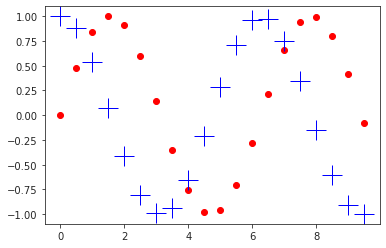

In [ ]:
xx = np.arange(0, 10, 0.5)
yy = np.sin(xx)
yy2= np.cos(xx)

plt.plot(xx, yy, 'ro')
plt.plot(xx, yy2, 'b+', markersize=20) #markersize o ms
plt.show()

Si presentamos cada variable en un eje, tenemos un gráfico de tipo scatter plot.

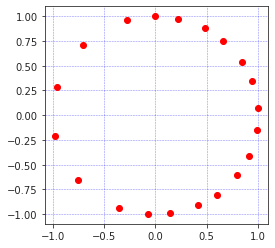

In [ ]:
#%% SCATTER PLOT de una variable contra otra
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(yy, yy2, 'ro')
ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)# linestyle o ls; linewidth o lw
plt.show()

También se pueden hacer directamente gráficos del tipo scatter plot. Por ejemplo aquí, cada dato tiene un color y un tamaño específico.

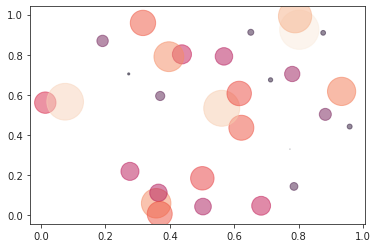

In [ ]:
np.random.seed(1234) #fija el factor random para reproducibilidad

N = 30
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)
area = (40 * z)**2  # radio de 0 a 20 en función del tamaño de la variable z

plt.scatter(x, y, marker='o', s=area, c=z, alpha=0.5)
plt.show()

También se pueden hacer gráficos scatter radiales .

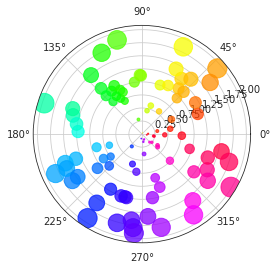

In [ ]:
np.random.seed(1234)

N = 100
r = 2 * np.random.rand(N) #el radio varía entre 0 y 2
theta = 2 * np.pi * np.random.rand(N) #el ángulo varía entre 0 y 360º
area = 100 * r**2 #el área de los marcadores aumenta con el radio
colors = theta #el color varíacon el ángulo

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75) #cmap='hsv' sirve para elegir un tipo de paleta de colores específico
plt.show()

##Gráficas de barras

Hay un comando específico para hacer gráficas de barras desde matplotlib.

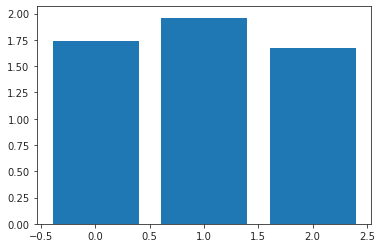

In [ ]:
#datos inventados de medias de grupos
condicion = np.arange(3)
variable = [1.75, 1.97, 1.68]


fig, ax = plt.subplots()
plt.bar(condicion,variable)
plt.show()

En casos como este, normalmente se incluye un texto debajo de cada barra, en lugar de un número.

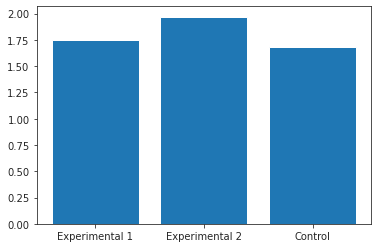

In [ ]:
nomCondiciones=['Experimental 1', 'Experimental 2', 'Control']
fig, ax = plt.subplots()
plt.bar(condicion,variable, tick_label=nomCondiciones)
plt.show()

Por supuesto, se pueden controlar todas las características de los elementos de la figura. En la siguiente se pueden ver varios ejemplos.

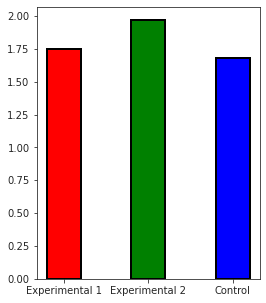

In [ ]:
nomCondiciones=['Experimental 1', 'Experimental 2', 'Control']
fig, ax = plt.subplots(figsize=(4,5))
plt.bar(condicion,variable, width=0.4, color=['r', 'g', 'b'], edgecolor='black', linewidth=2, tick_label=nomCondiciones)
plt.show()

En el siguiente ejemplo se puede ver una gráfica completa lista para publicación, con dos conjuntos de datos, con barras de error, etc.

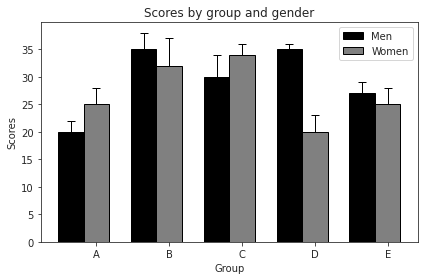

In [ ]:
n_groups = 5
index = np.arange(n_groups)

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)


fig, ax = plt.subplots()
bar_width = 0.35
opacity = 1

error_config=dict(elinewidth=1, barsabove='true', ecolor='black', capsize=4, capthick=1, alpha=opacity)

plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='0.0',
                 edgecolor='black',
                 yerr=np.vstack([[0]*len(std_men), std_men]),
                 error_kw=error_config,
                 label='Men',
                 linewidth=1)

plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='0.5',
                 edgecolor='black',
                 yerr=np.vstack([[0]*len(std_women), std_women]),
                 error_kw=error_config,
                 label='Women',
                 linewidth=1)


plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend(loc='best')


plt.tight_layout()

plt.show()

## Gráficas en 3D
Con matplotlib se pueden crear gráficas en 3D fácilmente.

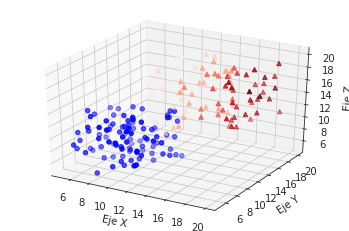

In [ ]:
from mpl_toolkits.mplot3d import Axes3D #para crear los ejes en 3D
import matplotlib.pyplot as plt
import numpy as np

#Crea unos datos
n=100
x1 = np.random.rand(n)*(13 - 5) + 5
y1 = np.random.rand(n)*(13 - 5) + 5
z1 = np.random.rand(n)*(13 - 5) + 5

x2 = np.random.rand(n)*(20 - 10) + 10
y2 = np.random.rand(n)*(20 - 10) + 10
z2 = np.random.rand(n)*(20 - 10) + 10


#Crea la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='b', marker='o')
ax.scatter(x2, y2, z2, marker='^', c=x2, cmap='Reds')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()

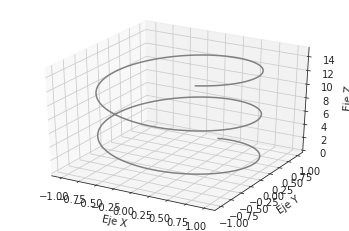

In [ ]:
#Crea unos datos
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

#Crea la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xline, yline, zline, 'gray')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()

También se puede rotar la vista.

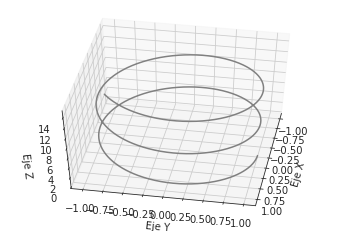

In [ ]:
#Crea unos datos
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

#Crea la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xline, yline, zline, 'gray')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

ax.view_init(50, 10) #cambia la posición de la cámara

plt.show()

También se pueden visualizar superficies.

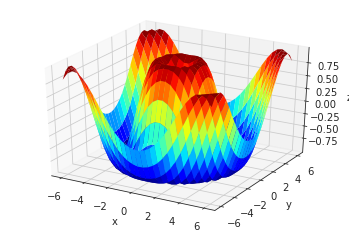

In [ ]:
#Crea unos datos
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

#Crea la figura
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=plt.cm.jet, edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

##Gráficas con Pandas directamente

Pandas es una librería de tratamiento de datos de Python muy completa. Entre otras, permite visualizar directamente los datos que contiene con diferentes opciones.

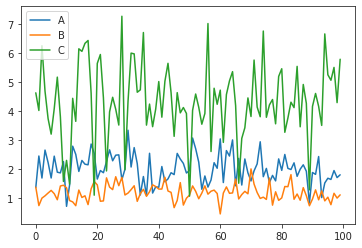

In [ ]:
import pandas as pd
import numpy as np

#Ejemplo de muestra aleatoria
means=[2.0, 1.2, 4.2]
sigmas=[0.5, 0.3, 1.2]
sx = np.random.normal(means, sigmas, [100, len(means)])
df=pd.DataFrame(sx, columns=['A','B','C']) #pasa el numpy a dataframe de pandas

df.plot()#por defecto gráfico de líneas

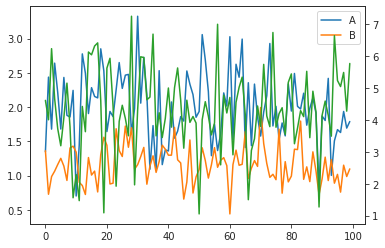

In [ ]:
#ponemos una variable en el eje secundario
df[['A','B']].plot()
df['C'].plot(secondary_y=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3df60e5d68>],
      dtype=object)

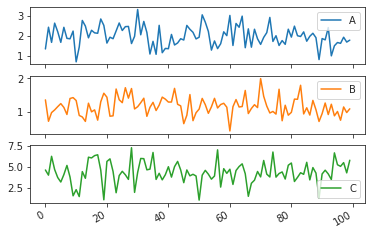

In [ ]:
#separa cada variable en un subplot, se puede indicar el nº de filas y columnas
df.plot(subplots=True, layout=(3, 1))

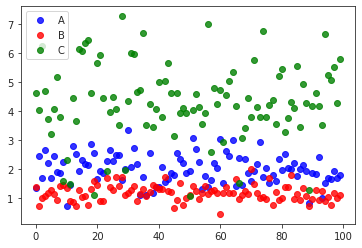

In [ ]:
#Gráfico de puntos
df.plot(style=['bo', 'ro', 'go'], alpha=0.8)

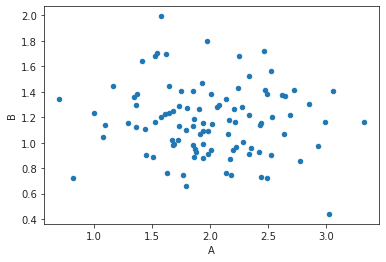

In [ ]:
#Scatter plot
df.plot(x='A',y='B', kind='scatter')

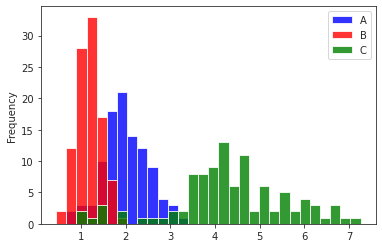

In [ ]:
#Histogramas
df.plot.hist(bins=30, color=['b','r', 'g'], alpha=0.8) #crea un histograma de cada variable

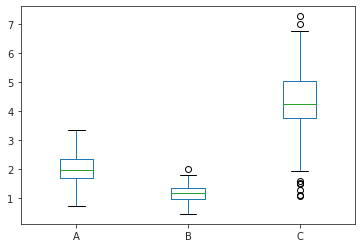

In [ ]:
#Diagrama de cajas
df.plot.box()


Otras opciones de gráficos son:
df.plot.area     df.plot.barh     df.plot.density  df.plot.hist     df.plot.line     df.plot.scatter
df.plot.bar      df.plot.box      df.plot.hexbin   df.plot.kde      df.plot.pie

### Gráficas de barras

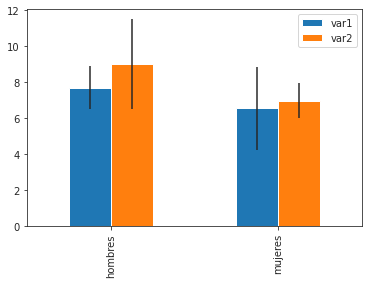

In [ ]:
dfMedias = pd.DataFrame([[7.70, 9.01],[6.56, 6.99]], columns=['var1', 'var2'], index=['hombres', 'mujeres'])
dfSD = pd.DataFrame([[1.2, 2.3],[2.5, 0.98]], columns=['var1', 'var2'], index=['hombres', 'mujeres'])

dfMedias.plot.bar(yerr=dfSD.values)


Se puede mejorar un poco el aspecto de la gráfica.

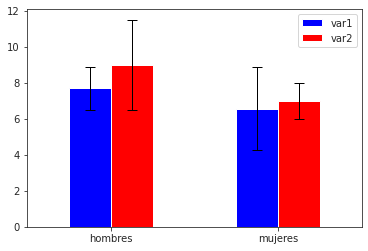

In [ ]:
error_config=dict(ecolor='k', barsabove=True, lw=1, capsize=5, capthick=1) #configura el aspecto de las barras de error
dfMedias.plot.bar(yerr=dfSD.values, error_kw=error_config, color=['b', 'r'], rot=0)

Para que muestre solamente la parte superior de las barras de error, hay que hacer un pequeño truco. Hay que pasar como argumento de error un array que contenga valores cero para la parte inferior y el de la SD real para la superior.

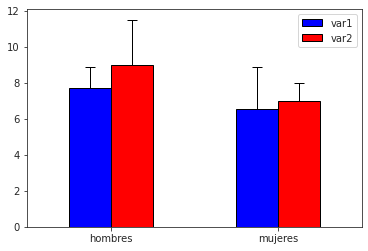

In [ ]:
dfMedias = pd.DataFrame([[7.70, 9.01],[6.56, 6.99]], columns=['var1', 'var2'], index=['hombres', 'mujeres'])
dfSD = pd.DataFrame([[[ 0,  0], [ 1.2,  2.3]],
                      [[ 0,  0], [ 2.5,  0.98]]], columns=['baja', 'alta(var1/var2)'], index=['hombres', 'mujeres'])

error_config=dict(ecolor='k', lw=1, capsize=5, capthick=1)

dfMedias.plot.bar(yerr=dfSD.values, error_kw=error_config, color=['b', 'r'], edgecolor = 'k', rot=0)
plt.show()

### Control del aspecto de los gráficos con Pandas
Desde la propia función de la gráfica de barras de Pandas se pueden usar instrucciones para configurar muchas partes del gráfico, como el título, los ejes y la leyenda entre otras.
Pero también se puede meter la gráfica dentro de una estructura de figura como las que teníamos anteriormente, y usar las mismas instrucciones anteriores para hacer los ajustes necesarios. Esto se puede hacer de dos formas. Primero creando el marco de la figura, como hacíamos anteriormente, y después pasar el argumento ax=ax al crear la figura:

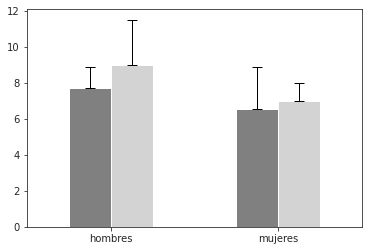

In [ ]:
import matplotlib.pyplot as plt #otra vez por si no lo teníamos cargado

fig, ax = plt.subplots()
dfMedias.plot.bar(yerr=dfSD.values, error_kw=error_config, color=['grey', 'lightgrey'], rot=0, legend=False, ax=ax)
plt.show()

Con esto ya podemos controlar todas las partes de la figura

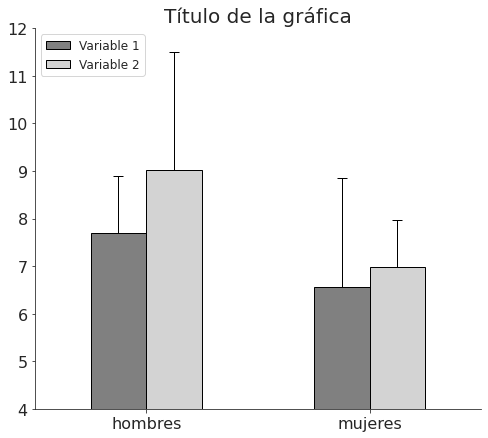

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
dfMedias.plot.bar(yerr=dfSD.values, error_kw=error_config, color=['grey', 'lightgrey'], edgecolor='k', rot=0, legend=False, ax=ax)

ax.set_ylim((4, 12)) #fija el tamaño de datos que abarca el eje Y
ax.tick_params(axis='both', which='major', labelsize=16) #ajusta el tamaño de letra de las etiquetas de los ejes. axis puede ser 'both', 'x' o 'y', y wich puede ser 'major' o 'minor'
ax.spines['top'].set_visible(False) #quita los bordes de uno en uno
ax.spines['right'].set_visible(False)
ax.set_title('Título de la gráfica', fontsize=20)
plt.legend(loc='upper left', fontsize=12, labels=['Variable 1', 'Variable 2'])
plt.show()

Y la otra forma de hacerlo es tomar la estructura de los ejes directamente de la instrucción que crea la gráfica de Pandas:

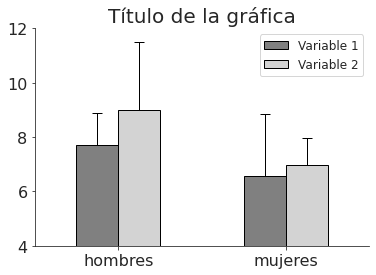

In [ ]:
ax=dfMedias.plot.bar(yerr=dfSD.values, error_kw=error_config, color=['grey', 'lightgrey'], edgecolor='k', rot=0, legend=False)

#Ahora se puede usar ese ax para modificar su aspecto
ax.set_ylim((4, 12)) #fija el tamaño de datos que abarca el eje Y
ax.tick_params(axis='both', which='major', labelsize=16) #ajusta el tamaño de letra de las etiquetas de los ejes. axis puede ser 'both', 'x' o 'y', y wich puede ser 'major' o 'minor'
ax.spines['top'].set_visible(False) #quita los bordes de uno en uno
ax.spines['right'].set_visible(False)
ax.set_title('Título de la gráfica', fontsize=20)
plt.legend(loc='upper right', fontsize=12, labels=['Variable 1', 'Variable 2'])

plt.show()

### ALGUNOS TIPOS DE GRÁFICOS SOFISTICADOS CON PANDAS

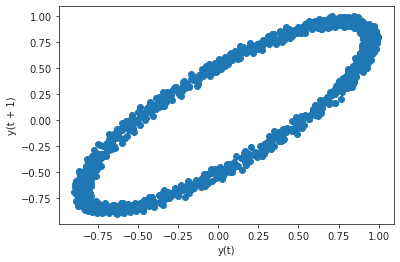

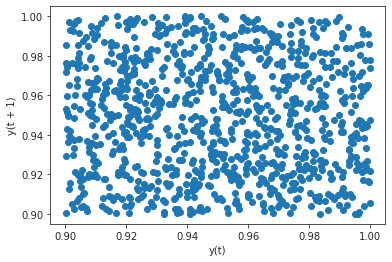

In [ ]:
#Lag Plot
#Para comprobar si los datos son aleatorios.

from pandas.plotting import lag_plot


data1 = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data1) #señal no aleatoria
plt.show()

data2 = pd.Series(0.1 * np.random.rand(1000) + 0.9 )
lag_plot(data2) #señal aleatoria
plt.show()

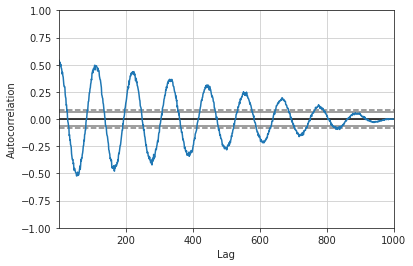

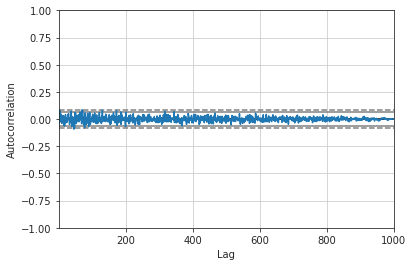

In [ ]:
#Autocorrelation Plot
"""
Autocorrelation plots are often used for checking randomness in time series. 
This is done by computing autocorrelations for data values at varying time lags. 
If time series is random, such autocorrelations should be near zero for any and 
all time-lag separations. If time series is non-random then one or more of the 
autocorrelations will be significantly non-zero. The horizontal lines displayed 
in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% 
confidence band.
"""

from pandas.plotting import autocorrelation_plot
data3 = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))

autocorrelation_plot(data3) #señal no aleatoria
plt.show()

autocorrelation_plot(data2) #señal aleatoria
plt.show()

## GUARDAR LAS GRÁFICAS EN ARCHIVOS DE IMAGEN Y EN PDF

### Archivos de imagen

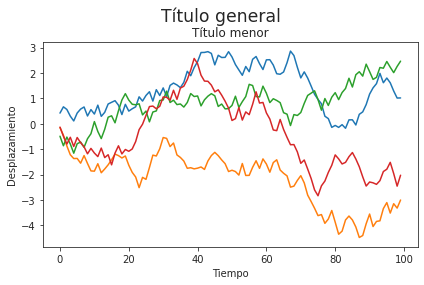

In [ ]:
unidadDisco = 'C:'
carpetaOriginal = '\Temp' 

caminos = (np.random.random([100, 4])-0.5).cumsum(axis=0)

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(caminos)

ax.set_ylabel('Desplazamiento')
ax.set_xlabel('Tiempo')
ax.set_title('Título menor')
plt.suptitle('Título general', x=0.52, horizontalalignment='center', fontsize='xx-large')#título de toda la figura, ajusta su posición
plt.tight_layout(rect=[0, 0, 1, 0.95]) #rect permite ajustar el tamaño de la zona de las gráficas.

fig.savefig(unidadDisco+carpetaOriginal+'\Grafica.png', dpi=200) #guarda la gráfica en un archivo de imagen (png, jpg, bmp, etc.)
plt.show()



### Archivos pdf

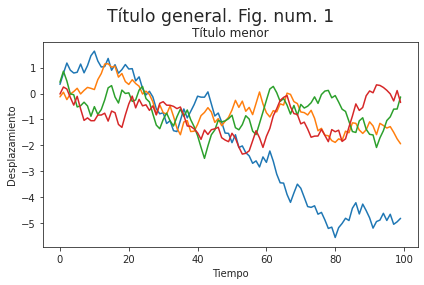

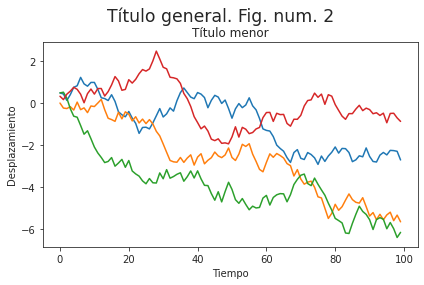

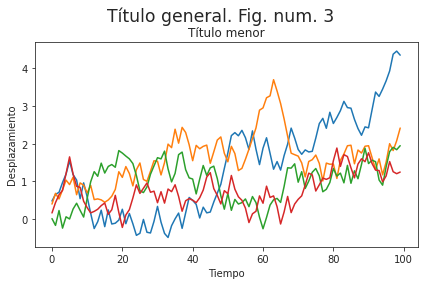

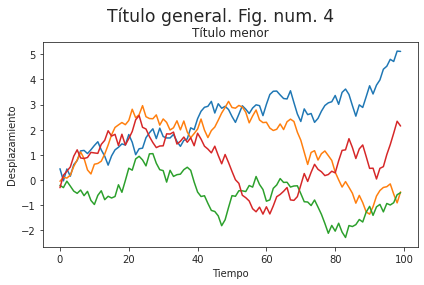

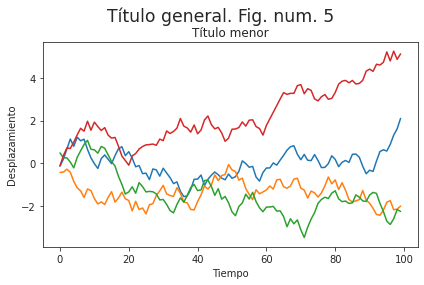

In [ ]:
#hacemos la misma figura de antes repetida varias veces
from matplotlib.backends.backend_pdf import PdfPages #para guardar gráficas en pdf

unidadDisco = 'C:'
carpetaOriginal = '\Temp'

#antes de hacer las gráficas, se crea el archivo pdf
pdf_pages = PdfPages(unidadDisco+carpetaOriginal+r'\Graficas.pdf')

for i in range(5): #crea 5 gráficas y las guarda en un mismo pdf
    caminos = (np.random.random([100, 4])-0.5).cumsum(axis=0)
    
    fig, ax = plt.subplots(figsize=(6,4))#controlando el tamaño y la resolución
    plt.plot(caminos)
    
    ax.set_ylabel('Desplazamiento')
    ax.set_xlabel('Tiempo')
    ax.set_title('Título menor')
    plt.suptitle('Título general. Fig. num. {0}'.format(i+1), x=0.52, horizontalalignment='center', fontsize='xx-large')#título de toda la figura, ajusta su posición
    plt.tight_layout(rect=[0, 0, 1, 0.95])#rect permite ajustar el tamaño de la zona de las gráficas.
    
    pdf_pages.savefig(fig)#con esto almacena la figura creada en una página del pdf
    plt.show()

#cuando ya están todas las gráficas hechas, se guarda y cierra el archivo pdf
pdf_pages.close()